In [1]:
# PCA section, Correlation, Heatmaps can be seen to be important

In [3]:
# Target variable Used ESRD patients: Avg. Annual Mortality rates is given the most importance

#Others Could be:
    
# One another target variable is: ESRD patients: Total (or %) deaths for target year
# Other target variables: Dialysis patients: Total (or %) deaths for target year

In [4]:
# For plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# data exploration
import pandas as pd
df = pd.read_csv('./data-for-code/food_subgroup_intake_acr_and_mortality.csv')
df.head()

,participant_id,participant_age,gender,food_group_name,food_subgroup_name,avg_food_weight_in_gms,acr,kidney_failed,systolic_pressure,diastolic_pressure,...,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate,age_from,age_to,ESRD patients: Avg. Annual Mortality rates,Dialysis patients: Avg. Annual Mortality rates,ESRD patients: Total (or %) deaths for target year,Dialysis patients: Total (or %) deaths for target year
0,83747,46,1,"Sugars, sweets, and beverages",Alcoholic beverages,750.00,38.92,2.0,144.0,94.0,...,NaN,NaN,1.0,NaN,45,49,5.980,8.735,3301.5,2893.0
1,83755,67,1,"Sugars, sweets, and beverages",Alcoholic beverages,210.00,19.88,2.0,132.0,84.0,...,NaN,NaN,0.0,NaN,65,69,15.475,19.285,15064.0,13041.0
2,83803,27,1,"Sugars, sweets, and beverages",Alcoholic beverages,345.00,2.45,2.0,120.0,72.0,...,NaN,NaN,NaN,NaN,25,29,2.845,4.680,354.0,311.0
3,83853,49,2,"Sugars, sweets, and beverages",Alcoholic beverages,435.00,4.55,2.0,122.0,86.0,...,NaN,NaN,NaN,NaN,45,49,5.980,8.735,3301.5,2893.0
4,83894,60,1,"Sugars, sweets, and beverages",Alcoholic beverages,641.67,373.93,2.0,166.0,100.0,...,NaN,1.0,3.0,NaN,60,64,12.035,15.550,11710.5,10175.0


In [7]:
df.describe()

,participant_id,participant_age,gender,avg_food_weight_in_gms,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,...,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate,age_from,age_to,ESRD patients: Avg. Annual Mortality rates,Dialysis patients: Avg. Annual Mortality rates,ESRD patients: Total (or %) deaths for target year,Dialysis patients: Total (or %) deaths for target year
count,108768.000000,108768.000000,108768.000000,108768.000000,105582.000000,72775.000000,93270.000000,93270.000000,108768.000000,108768.000000,...,6965.000000,27354.000000,69058.000000,0.0,108768.000000,108768.000000,108768.000000,108768.000000,108768.000000,108768.000000
mean,88765.315019,37.303315,1.519611,164.054298,43.876484,1.965538,120.931017,66.260663,179.561415,7.305974,...,2.377602,1.498830,1.290292,NaN,35.523683,39.267386,7.518997,9.875691,4328.904531,3809.742493
std,2867.698388,23.856184,0.499618,284.503168,357.927124,0.321403,18.621494,14.103232,212.899901,12.413807,...,1.194407,0.872035,1.199296,NaN,23.987375,24.207423,8.988376,9.288070,5510.584407,4842.176872
min,83732.000000,3.000000,1.000000,0.030000,0.220000,1.000000,72.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,NaN,0.000000,4.000000,0.505000,1.115000,8.000000,3.500000
25%,86281.000000,14.000000,1.000000,32.810000,5.200000,2.000000,108.000000,58.000000,43.000000,0.390000,...,1.000000,1.000000,0.000000,NaN,14.000000,17.000000,0.925000,4.065000,12.500000,8.000000
50%,88814.000000,36.000000,2.000000,85.000000,8.180000,2.000000,118.000000,66.000000,119.000000,2.590000,...,2.000000,1.000000,1.000000,NaN,35.000000,39.000000,4.140000,6.460000,1120.500000,1001.500000
75%,91234.000000,58.000000,2.000000,198.450000,15.770000,2.000000,130.000000,76.000000,237.000000,8.400000,...,3.000000,2.000000,2.000000,NaN,55.000000,59.000000,9.675000,12.955000,8585.500000,7515.000000
max,93702.000000,80.000000,2.000000,9600.000000,21152.170000,9.000000,236.000000,120.000000,4100.000000,247.640000,...,9.000000,9.000000,9.000000,NaN,80.000000,84.000000,37.590000,38.800000,15064.000000,13041.000000


In [8]:
#####
df_food_subgroup_only = df[ ['participant_id',  'food_subgroup_name', 'avg_food_weight_in_gms'] ]
df_food_subgroup_only.head()

df_food_subgroup_only_index = df_food_subgroup_only.set_index(['participant_id', 'food_subgroup_name'])
df_food_subgroup_only_index

df_food_subgroup_only_index_unstack = df_food_subgroup_only_index.unstack()
df_food_subgroup_only_index_unstack.head()
#####

avg_food_weight_in_gms          \
food_subgroup_name   Alcoholic beverages     Beef   
participant_id                                      
83732                                 NaN  113.33   
83733                              1740.0     NaN   
83734                                 NaN  113.40   
83735                                 NaN     NaN   
83736                                 NaN     NaN   

                                                          \
food_subgroup_name Cakes, cookies, pies, pastries, bars    
participant_id                                             
83732                                               48.0   
83733                                              475.2   
83734                                                NaN   
83735                                                NaN   
83736                                                NaN   

                                                                     \
food_subgroup_name Cereals, not cooked or NS as to cooked  Cheeses    
participant_id                                                        
83732                                                  NaN      NaN   
83733                                                  NaN      NaN   
83734                                                  NaN      NaN   
83735                                                  NaN      NaN   
83736                                                  NaN      NaN   

                                           \
food_subgroup_name Citrus fruits, juices    
participant_id                              
83732                               192.0   
83733                                 NaN   
83734                                 NaN   
83735                                 NaN   
83736                                96.0   

                                                                   \
food_subgroup_name Crackers and salty snacks from grain products    
participant_id                                                      
83732                                                       32.05   
83733                                                         NaN   
83734                                                       28.00   
83735                                                       21.00   
83736                                                         NaN   

                                                                         \
food_subgroup_name Creams and cream substitutes  Dark-green vegetables    
participant_id                                                            
83732                                       2.94                   76.5   
83733                                        NaN                    NaN   
83734                                       7.83                    NaN   
83735                                      15.50                    NaN   
83736                                        NaN                    NaN   

                                                   ...           \
food_subgroup_name Deep-yellow vegetables          ...            
participant_id                                     ...            
83732                                  NaN         ...            
83733                                  NaN         ...            
83734                                  NaN         ...            
83735                                  NaN         ...            
83736                                  NaN         ...            

                                                         \
food_subgroup_name Sandwiches with meat, poultry, fish    
participant_id                                            
83732                                             204.0   
83733                                               NaN   
83734                                             225.0   
83735                                             242.0   
83736                                               NaN   

                   

In [9]:
df_without_food_subgroups = df.drop(['food_subgroup_name',  'avg_food_weight_in_gms'], axis=1)
df_without_food_subgroups.head()

df_without_food_subgroups_one_entry = df_without_food_subgroups.groupby(['participant_id']).mean()
df_without_food_subgroups_one_entry.head()

,participant_age,gender,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,...,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate,age_from,age_to,ESRD patients: Avg. Annual Mortality rates,Dialysis patients: Avg. Annual Mortality rates,ESRD patients: Total (or %) deaths for target year,Dialysis patients: Total (or %) deaths for target year
participant_id,,,,,,,,,,,,,,,,,,,,,
83732,62.0,1.0,6.10,2.0,128.0,70.0,181.761905,8.924048,395.420635,18.284286,...,NaN,NaN,0.0,NaN,60.0,64.0,12.035,15.550,11710.5,10175.0
83733,53.0,1.0,12.82,2.0,146.0,88.0,372.541667,12.121250,461.083333,37.678333,...,NaN,NaN,0.0,NaN,50.0,54.0,7.540,10.600,5466.0,4798.5
83734,78.0,1.0,150.00,1.0,138.0,46.0,204.575000,10.043000,396.916667,21.993500,...,NaN,NaN,1.0,NaN,75.0,79.0,25.350,28.050,14124.5,12452.5
83735,56.0,2.0,5.69,2.0,132.0,72.0,155.875000,8.677500,286.125000,17.962500,...,NaN,1.0,1.0,NaN,55.0,59.0,9.675,12.955,8585.5,7515.0
83736,42.0,2.0,15.11,2.0,100.0,70.0,119.500000,3.234000,195.700000,15.350000,...,NaN,1.0,1.0,NaN,40.0,44.0,4.515,6.815,1824.5,1611.0


In [10]:
merged = df_food_subgroup_only_index_unstack.merge(df_without_food_subgroups_one_entry,  how='inner', left_on='participant_id', right_on='participant_id', left_index=True)
merged.head()
merged.shape
merged.head()

,"(avg_food_weight_in_gms, Alcoholic beverages )","(avg_food_weight_in_gms, Beef)","(avg_food_weight_in_gms, Cakes, cookies, pies, pastries, bars )","(avg_food_weight_in_gms, Cereals, not cooked or NS as to cooked )","(avg_food_weight_in_gms, Cheeses )","(avg_food_weight_in_gms, Citrus fruits, juices )","(avg_food_weight_in_gms, Crackers and salty snacks from grain products )","(avg_food_weight_in_gms, Creams and cream substitutes )","(avg_food_weight_in_gms, Dark-green vegetables )","(avg_food_weight_in_gms, Deep-yellow vegetables )",...,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate,age_from,age_to,ESRD patients: Avg. Annual Mortality rates,Dialysis patients: Avg. Annual Mortality rates,ESRD patients: Total (or %) deaths for target year,Dialysis patients: Total (or %) deaths for target year
participant_id,,,,,,,,,,,,,,,,,,,,,
83732,NaN,113.33,48.0,NaN,NaN,192.0,32.05,2.94,76.5,NaN,...,NaN,NaN,0.0,NaN,60.0,64.0,12.035,15.550,11710.5,10175.0
83733,1740.0,NaN,475.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,50.0,54.0,7.540,10.600,5466.0,4798.5
83734,NaN,113.40,NaN,NaN,NaN,NaN,28.00,7.83,NaN,NaN,...,NaN,NaN,1.0,NaN,75.0,79.0,25.350,28.050,14124.5,12452.5
83735,NaN,NaN,NaN,NaN,NaN,NaN,21.00,15.50,NaN,NaN,...,NaN,1.0,1.0,NaN,55.0,59.0,9.675,12.955,8585.5,7515.0
83736,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,40.0,44.0,4.515,6.815,1824.5,1611.0


In [11]:
# remove extra spaces in the column names
column_dict = {}
for aName in merged.columns:
    #print(aName)
    try:
        #if ( aName.index( 'avg_food_weight_in_gms' ) >= 0):
        if 'avg_food_weight_in_gms' in aName:
            #aName = 
            column_dict[aName] = aName[1] #aName.strip()
        else:
            column_dict[aName] = aName #.strip()
        
    except:
        print(aName)
        continue

# column_dict

In [12]:
merged = merged.rename(index=str, columns=column_dict)
merged.head()

,Alcoholic beverages,Beef,"Cakes, cookies, pies, pastries, bars","Cereals, not cooked or NS as to cooked",Cheeses,"Citrus fruits, juices",Crackers and salty snacks from grain products,Creams and cream substitutes,Dark-green vegetables,Deep-yellow vegetables,...,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate,age_from,age_to,ESRD patients: Avg. Annual Mortality rates,Dialysis patients: Avg. Annual Mortality rates,ESRD patients: Total (or %) deaths for target year,Dialysis patients: Total (or %) deaths for target year
participant_id,,,,,,,,,,,,,,,,,,,,,
83732,NaN,113.33,48.0,NaN,NaN,192.0,32.05,2.94,76.5,NaN,...,NaN,NaN,0.0,NaN,60.0,64.0,12.035,15.550,11710.5,10175.0
83733,1740.0,NaN,475.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,50.0,54.0,7.540,10.600,5466.0,4798.5
83734,NaN,113.40,NaN,NaN,NaN,NaN,28.00,7.83,NaN,NaN,...,NaN,NaN,1.0,NaN,75.0,79.0,25.350,28.050,14124.5,12452.5
83735,NaN,NaN,NaN,NaN,NaN,NaN,21.00,15.50,NaN,NaN,...,NaN,1.0,1.0,NaN,55.0,59.0,9.675,12.955,8585.5,7515.0
83736,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,40.0,44.0,4.515,6.815,1824.5,1611.0


In [13]:
data_folder = './data-for-code/'

merged_f = merged.fillna(0)
merged_f.to_csv(data_folder + 'mortality-food-subgroups-subgroup-names-on-columns-survival.csv')

In [14]:
merged_f.head()
df = merged_f
st = df

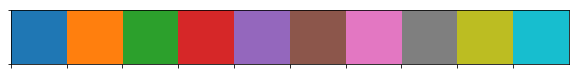

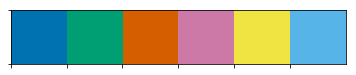

In [15]:
# deep, muted, pastel, bright, dark, and colorblind.
current_palette = sns.color_palette()
sns.palplot(current_palette)
sns.set_palette('colorblind')
current_palette = sns.color_palette()
sns.palplot(current_palette)


In [16]:
list(df.columns)

['Alcoholic beverages ',
 'Beef',
 'Cakes, cookies, pies, pastries, bars ',
 'Cereals, not cooked or NS as to cooked ',
 'Cheeses ',
 'Citrus fruits, juices ',
 'Crackers and salty snacks from grain products ',
 'Creams and cream substitutes ',
 'Dark-green vegetables ',
 'Deep-yellow vegetables ',
 'Dried fruits ',
 'Egg mixtures',
 'Egg substitutes ',
 'Eggs',
 'Fats',
 'Fish and shellfish ',
 'Formulated nutrition beverages, energy drinks, sports drinks, functional beverages ',
 'Frankfurters, sausages, lunchmeats, meat spreads',
 'Frozen or shelf-stable plate meals with meat, poultry, fish as major ingredient ',
 'Fruit juices and nectars excluding citrus ',
 'Fruits and juices baby food ',
 'Grain mixtures, frozen plate meals, soups ',
 'Gravies from meat, poultry, fish base ',
 'Lamb, veal, game, other carcass meat ',
 'Legumes ',
 'Meat substitutes, mainly cereal protein ',
 'Meat, NS as to type ',
 'Meat, poultry, fish in gravy or sauce or creamed ',
 'Meat, poultry, fish with 

In [17]:
df_actual_only = df[
    
    
    [

     'Alcoholic beverages ',
     'Beef',
     'Cakes, cookies, pies, pastries, bars ',
     'Cereals, not cooked or NS as to cooked ',
     'Cheeses ',
     'Citrus fruits, juices ',
     'Crackers and salty snacks from grain products ',
     'Creams and cream substitutes ',
     'Dark-green vegetables ',
     'Deep-yellow vegetables ',
     'Dried fruits ',
     'Egg mixtures',
     'Egg substitutes ',
     'Eggs',
     'Fats',
     'Fish and shellfish ',
     'Formulated nutrition beverages, energy drinks, sports drinks, functional beverages ',
     'Frankfurters, sausages, lunchmeats, meat spreads',
     'Frozen or shelf-stable plate meals with meat, poultry, fish as major ingredient ',
     'Fruit juices and nectars excluding citrus ',
     'Fruits and juices baby food ',
     'Grain mixtures, frozen plate meals, soups ',
     'Gravies from meat, poultry, fish base ',
     'Lamb, veal, game, other carcass meat ',
     'Legumes ',
     'Meat substitutes, mainly cereal protein ',
     'Meat, NS as to type ',
     'Meat, poultry, fish in gravy or sauce or creamed ',
     'Meat, poultry, fish with starch item (includes white potatoes) ',
     'Meat, poultry, fish with starch item and vegetables ',
     'Meat, poultry, fish with vegetables (excluding white potatoes) ',
     'Milk desserts, sauces, gravies ',
     'Milks and milk drinks ',
     'Mixtures mostly vegetables without meat, poultry, fish ',
     'Nonalcoholic beverages ',
     'Nuts, nut butters, and nut mixtures ',
     'Oils ',
     'Organ meats and mixtures ',
     'Other fruits ',
     'Other vegetables ',
     'Pancakes, waffles, French toast, other grain products ',
     'Pastas, cooked cereals, rice ',
     'Pork',
     'Poultry',
     'Quick breads ',
     'Salad dressings ',
     'Sandwiches with meat, poultry, fish ',
     'Seeds and seed mixtures ',
     'Soups, broths, extracts from meat, poultry, fish base ',
     'Sugars and sweets ',
     'Tomatoes and tomato mixtures ',
     'Vegetables and mixtures mostly vegetables baby food ',
     'Vegetables with meat, poultry, fish ',
     'Water, noncarbonated ',
     'White potatoes and Puerto Rican starchy vegetables ',
     'Yeast breads, rolls ',
     #'participant_age',
     #'gender',
     #'acr',
     #'kidney_failed',
     #'systolic_pressure',
     #'diastolic_pressure',
     #'calorie',
     #'protein',
     #'sodium',
     #'carbohydrate',
     #'sugar',
     #'fibre',
     #'fat',
     #'saturated_fat',
     #'mono_fat',
     #'poly_fat',
     #'cholesterol',
     #'calcium',
     #'phosphorous',
     #'magnesium',
     #'potassium',
     #'alcohol',
     #'a_sample_food_code',
     #'food_group_id',
     #'albumin_urine_mu_g',
     #'albumin_urine_mg',
     #'creatinine_mu_mol',
     #'creatinine_mg',
     #'received_dialysis_in_12_months',
     #'kidney_stones',
     #'passed_kidney_stones_12_months',
     #'urinary_leakage_frequency',
     #'urine_lose_each_time',
     #'leak_during_activities',
     #'how_frequent_leak_occurs',
     #'urinated_before_reaching_toilet',
     #'how_frequent',
     #'leak_during_nonphysical_activities',
     #'how_frequest_leak_nonphysical',
     #'how_much_leak_bothering',
     #'how_much_daily_activities_affected',
     #'count_night_time_urinate',
     #'age_from',
     #'age_to',
     'ESRD patients: Avg. Annual Mortality rates',
     #'Dialysis patients: Avg. Annual Mortality rates',
     #'ESRD patients: Total (or %) deaths for target year',
     #'Dialysis patients: Total (or %) deaths for target year'

    ]    
    
    
]

In [19]:
df_actual_only.head()

,Alcoholic beverages,Beef,"Cakes, cookies, pies, pastries, bars","Cereals, not cooked or NS as to cooked",Cheeses,"Citrus fruits, juices",Crackers and salty snacks from grain products,Creams and cream substitutes,Dark-green vegetables,Deep-yellow vegetables,...,Seeds and seed mixtures,"Soups, broths, extracts from meat, poultry, fish base",Sugars and sweets,Tomatoes and tomato mixtures,Vegetables and mixtures mostly vegetables baby food,"Vegetables with meat, poultry, fish","Water, noncarbonated",White potatoes and Puerto Rican starchy vegetables,"Yeast breads, rolls",ESRD patients: Avg. Annual Mortality rates
participant_id,,,,,,,,,,,,,,,,,,,,,
83732,0.0,113.33,48.0,0.0,0.0,192.0,32.05,2.94,76.5,0.0,...,0.0,0.0,3.00,20.00,0.0,0.0,280.0,187.5,63.5,12.035
83733,1740.0,0.00,475.2,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,7.29,123.00,0.0,0.0,493.5,0.0,64.0,7.540
83734,0.0,113.40,0.0,0.0,0.0,0.0,28.00,7.83,0.0,0.0,...,0.0,0.0,0.00,23.99,0.0,0.0,530.0,255.0,81.0,25.350
83735,0.0,0.00,0.0,0.0,0.0,0.0,21.00,15.50,0.0,0.0,...,0.0,0.0,10.67,0.00,0.0,0.0,180.0,89.3,0.0,9.675
83736,0.0,0.00,0.0,0.0,0.0,96.0,0.00,0.00,0.0,0.0,...,0.0,0.0,12.50,0.00,0.0,0.0,0.0,6.0,0.0,4.515


In [20]:
# df_actual_only = df.drop(['Age-group: From USRDS', 'Age-group: To USRDS', 'Gender'], axis=1)
# df_actual_only.head()

In [21]:
####----
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
import sklearn
from sklearn import preprocessing
standardisedX = sklearn.preprocessing.scale(df_actual_only)
standardisedX = pd.DataFrame(standardisedX, index=df_actual_only.index, columns=df_actual_only.columns)
standardisedX.apply(np.mean), '---\n', standardisedX.apply(np.std)

(Alcoholic beverages                                                                    3.822242e-16
 Beef                                                                                   3.728486e-16
 Cakes, cookies, pies, pastries, bars                                                   3.171157e-16
 Cereals, not cooked or NS as to cooked                                                -5.310954e-17
 Cheeses                                                                               -3.494617e-16
 Citrus fruits, juices                                                                  1.694832e-17
 Crackers and salty snacks from grain products                                         -5.346437e-16
 Creams and cream substitutes                                                          -2.294874e-16
 Dark-green vegetables                                                                  9.322008e-16
 Deep-yellow vegetables                                                                -3.5

In [22]:
standardisedX.columns

Index(['Alcoholic beverages ', 'Beef', 'Cakes, cookies, pies, pastries, bars ',
       'Cereals, not cooked or NS as to cooked ', 'Cheeses ',
       'Citrus fruits, juices ',
       'Crackers and salty snacks from grain products ',
       'Creams and cream substitutes ', 'Dark-green vegetables ',
       'Deep-yellow vegetables ', 'Dried fruits ', 'Egg mixtures',
       'Egg substitutes ', 'Eggs', 'Fats', 'Fish and shellfish ',
       'Formulated nutrition beverages, energy drinks, sports drinks, functional beverages ',
       'Frankfurters, sausages, lunchmeats, meat spreads',
       'Frozen or shelf-stable plate meals with meat, poultry, fish as major ingredient ',
       'Fruit juices and nectars excluding citrus ',
       'Fruits and juices baby food ',
       'Grain mixtures, frozen plate meals, soups ',
       'Gravies from meat, poultry, fish base ',
       'Lamb, veal, game, other carcass meat ', 'Legumes ',
       'Meat substitutes, mainly cereal protein ', 'Meat, NS as to type

In [23]:
y = abs(standardisedX['ESRD patients: Avg. Annual Mortality rates']) > 0.5 
standardisedX_with_target = standardisedX
standardisedX = standardisedX.drop(['ESRD patients: Avg. Annual Mortality rates'], axis=1) #, 'ESRD patients: Total (or %) deaths for target year',
                                   #'Dialysis patients: Total (or %) deaths for target year', 'Dialysis patients: Avg. Annual Mortality rates'], axis=1)

In [24]:
from sklearn import decomposition
#pca = decomposition.PCA(n_components=2).fit(standardisedX)
pca = decomposition.PCA().fit(standardisedX)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
#ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame( list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [26]:
####----
summary = pca_summary(pca, standardisedX)
####----

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.361639,0.033108,0.033108
PC2,1.276259,0.029086,0.062195
PC3,1.241879,0.027540,0.089735
PC4,1.137246,0.023095,0.112830
PC5,1.126993,0.022681,0.135511
PC6,1.111815,0.022074,0.157585
PC7,1.099553,0.021590,0.179174
PC8,1.085800,0.021053,0.200227
PC9,1.062775,0.020169,0.220396


In [27]:
# First 43 components can define over 80% 

In [28]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
np.sum( summary.sdev ** 2 )
plt.rcParams['figure.figsize'] = 16, 8

# Important Components

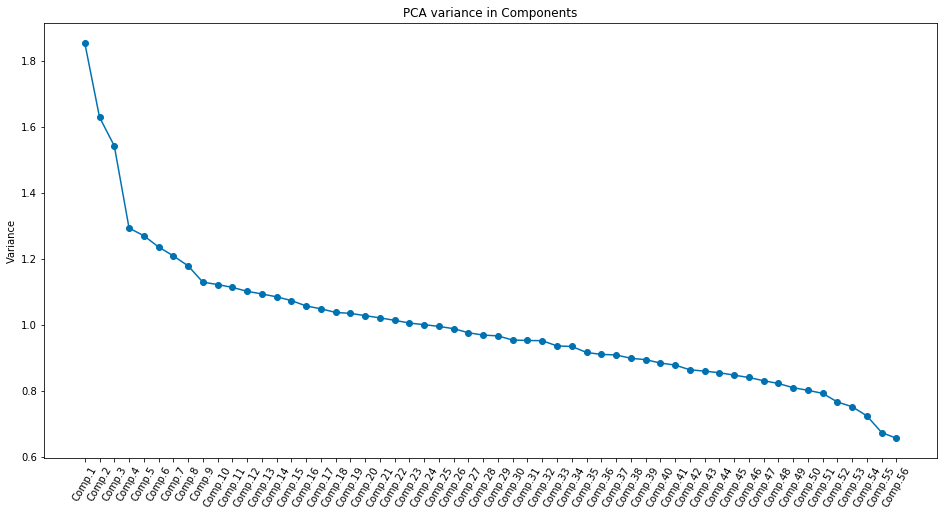

In [29]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.title('PCA variance in Components')
    plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png')            
    plt.show()

screeplot(pca, standardisedX)
#plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png') 

In [30]:
# comp 4 to 5 has the most slope change

In [31]:
#summary.sdev**2
#pca.components_[0]
#np.sum(pca.components_[0]**2)

In [32]:
####----
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code, I am using this as (similar to) a library function with some adjustments
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [33]:
####----
calcpc(standardisedX, pca.components_[0])
pca.transform(standardisedX)[:, 0]
pca.transform(standardisedX)[:, 0]
pca.components_[1]
np.sum(pca.components_[1]**2)
#highest loadings for

1.0000000000000007

In [34]:
# Define high and low mortality
# The code below is not used.
# y as defined earlier will rather be used

#import sklearn 
#from sklearn import preprocessing
#standardisedX_mortality = sklearn.preprocessing.scale(df_diff_ratio_mortality)
#standardisedX_mortality = pd.DataFrame(standardisedX_mortality, index=df_diff_ratio_mortality.index, columns=df_diff_ratio_mortality.columns)
#standardisedX_mortality.apply(np.mean), '---', standardisedX_mortality.apply(np.std)
#standardisedX_mortality

,Alcoholic beverages,Beef,"Cakes, cookies, pies, pastries, bars","Cereals, not cooked or NS as to cooked",Cheeses,"Citrus fruits, juices",Crackers and salty snacks from grain products,Creams and cream substitutes,Dark-green vegetables,Deep-yellow vegetables,...,"Sandwiches with meat, poultry, fish",Seeds and seed mixtures,"Soups, broths, extracts from meat, poultry, fish base",Sugars and sweets,Tomatoes and tomato mixtures,Vegetables and mixtures mostly vegetables baby food,"Vegetables with meat, poultry, fish","Water, noncarbonated",White potatoes and Puerto Rican starchy vegetables,"Yeast breads, rolls"
participant_id,,,,,,,,,,,,,,,,,,,,,
83732,-0.276774,1.746677,0.285003,-0.539209,-0.542523,1.215913,0.705366,-0.181967,1.301009,-0.288015,...,1.636382,-0.111702,-0.225953,-0.391486,-0.068325,-0.018331,-0.032501,-0.416625,1.655569,0.666359
83733,4.198610,-0.354007,8.476163,-0.539209,-0.542523,-0.498846,-0.621731,-0.352918,-0.321501,-0.288015,...,-0.526308,-0.111702,-0.225953,-0.256012,1.941238,-0.018331,-0.032501,-0.119051,-0.636411,0.679067
83734,-0.276774,1.747975,-0.635352,-0.539209,-0.542523,-0.498846,0.537667,0.102370,-0.321501,-0.288015,...,1.859012,-0.111702,-0.225953,-0.486223,0.009521,-0.018331,-0.032501,-0.068178,2.480682,1.111123
83735,-0.276774,-0.354007,-0.635352,-0.539209,-0.542523,-0.498846,0.247818,0.548353,-0.321501,-0.288015,...,2.039236,-0.111702,-0.225953,-0.149275,-0.458532,-0.018331,-0.032501,-0.556004,0.455183,-0.947498
83736,-0.276774,-0.354007,-0.635352,-0.539209,-0.542523,0.358534,-0.621731,-0.352918,-0.321501,-0.288015,...,-0.526308,-0.111702,-0.225953,-0.091486,-0.458532,-0.018331,-0.032501,-0.806885,-0.563068,-0.947498
83737,-0.276774,-0.354007,-0.635352,1.465546,0.111238,0.179913,-0.621731,-0.352918,-0.321501,-0.288015,...,-0.526308,-0.111702,-0.225953,-0.263275,-0.458532,-0.018331,-0.032501,-0.250206,-0.636411,0.882387
83738,-0.276774,-0.354007,0.400048,-0.002221,0.111238,0.287086,0.853603,-0.352918,-0.321501,-0.288015,...,4.244331,-0.111702,-0.225953,-0.486223,0.112145,-0.018331,-0.032501,-0.461923,-0.636411,0.475746
83739,-0.276774,-0.354007,-0.026575,-0.539209,-0.542523,-0.498846,0.620481,-0.352918,-0.321501,-0.288015,...,0.555037,-0.111702,-0.225953,-0.019802,-0.458532,-0.018331,-0.032501,-0.305122,-0.636411,-0.235876
83741,-0.276774,-0.354007,1.542055,2.514821,-0.542523,-0.498846,-0.621731,1.391477,3.814308,-0.288015,...,-0.526308,-0.111702,-0.225953,1.092726,-0.165877,-0.018331,-0.032501,-0.001276,2.419562,-0.947498


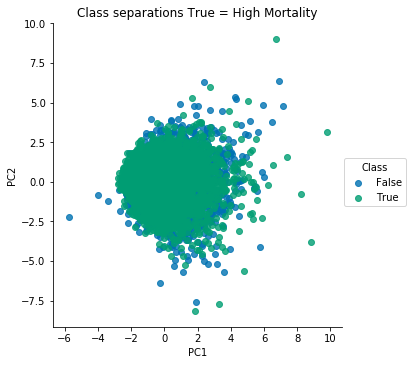

In [35]:
####----
# # ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code from the URL above, using this as a library function
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    #plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)

# y can be used as classes like High, low, neutral mortality

# plt.suptitle('Mortality class and Principle components, y can be used as classes like High, low, neutral mortality');
plt.title('Class separations True = High Mortality')
plt.savefig('./images/pca_components_separating_high_low_mortality' + '.png')            
standardisedX

# Plot first two components

Next section (i.e. four components) is more important than this

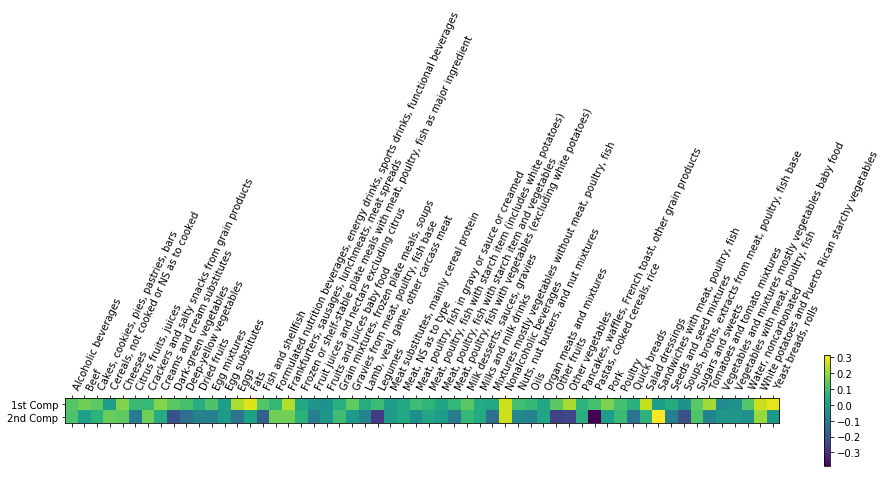

In [36]:
####----
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21


pca_components_cont = pca.components_[0:2]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
#plt.xticks(range(1, len(df_esrdonly.columns)),df_esrdonly.columns[1:len(df_esrdonly.columns)],rotation=65)
plt.xticks(range(len(standardisedX.columns)),standardisedX.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.savefig('./images/pca_food_groups_what_contributes_to_PCA_components' + '.png')            
plt.show() # 
# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

# all components

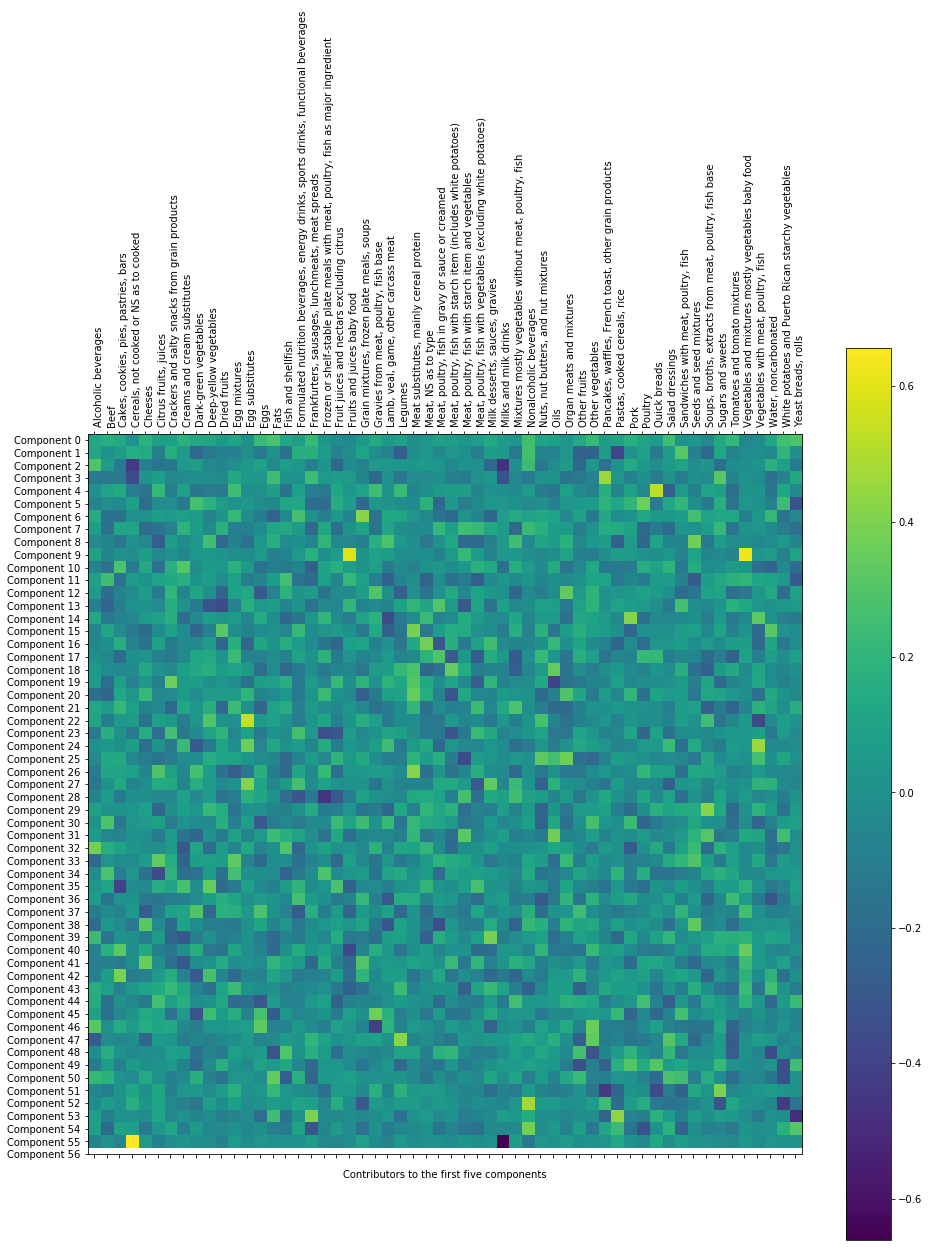

In [37]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 57

pca_components_cont = pca.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c) 
    
plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels, ylabels, fontsize=10)
plt.colorbar()
plt.xlabel('\nContributors to the first five components')
plt.xticks(range(len(standardisedX.columns)), standardisedX.columns, rotation=90, ha='left')
plt.show()# 

In [38]:
Among all: 
negatives:

    [
        #'Alcoholic beverages ', 
        'Beef', 
        'Cakes, cookies, pies, pastries, bars ',
       'Cereals, not cooked or NS as to cooked ', 
        'Cheeses ',
       'Citrus fruits, juices ',
       'Crackers and salty snacks from grain products ',
       'Creams and cream substitutes ', 
        'Dark-green vegetables ',
       'Deep-yellow vegetables ', 
        'Dried fruits ', 
        'Egg mixtures',
       'Egg substitutes ', 'Eggs', 'Fats', 'Fish and shellfish ',
       'Formulated nutrition beverages, energy drinks, sports drinks, functional beverages ',
       'Frankfurters, sausages, lunchmeats, meat spreads',
       'Frozen or shelf-stable plate meals with meat, poultry, fish as major ingredient ',
       'Fruit juices and nectars excluding citrus ',
       'Fruits and juices baby food ',
       'Grain mixtures, frozen plate meals, soups ',
       'Gravies from meat, poultry, fish base ',
       'Lamb, veal, game, other carcass meat ', 'Legumes ',
       'Meat substitutes, mainly cereal protein ', 'Meat, NS as to type ',
       'Meat, poultry, fish in gravy or sauce or creamed ',
       'Meat, poultry, fish with starch item (includes white potatoes) ',
       'Meat, poultry, fish with starch item and vegetables ',
       'Meat, poultry, fish with vegetables (excluding white potatoes) ',
       'Milk desserts, sauces, gravies ', 'Milks and milk drinks ',
       'Mixtures mostly vegetables without meat, poultry, fish ',
       'Nonalcoholic beverages ', 'Nuts, nut butters, and nut mixtures ',
       'Oils ', 'Organ meats and mixtures ', 'Other fruits ',
       'Other vegetables ',
       'Pancakes, waffles, French toast, other grain products ',
       'Pastas, cooked cereals, rice ', 'Pork', 'Poultry', 'Quick breads ',
       'Salad dressings ', 'Sandwiches with meat, poultry, fish ',
       'Seeds and seed mixtures ',
       'Soups, broths, extracts from meat, poultry, fish base ',
       'Sugars and sweets ', 'Tomatoes and tomato mixtures ',
       'Vegetables and mixtures mostly vegetables baby food ',
       'Vegetables with meat, poultry, fish ', 'Water, noncarbonated ',
       'White potatoes and Puerto Rican starchy vegetables ',
       'Yeast breads, rolls ', 'ESRD patients: Avg. Annual Mortality rates'
       

    Positive: Fruits, juices, baby foods, pancakes affle, Grain mixture, quick breads, egg substitutes, cereals-not-cooked, non-alcoholic, vegetables and mixtures, meat-substitute-cereal-protein, crackers-salty, dried-fruits, eggs, fats, frank-sausage, grain-mixtures, gravies, gravies from meat, legumes, meat substitutes, oils, pancakes, pasta-cooked, quick bread, seed-seed-mixture, soip, vegetable mixture, vegetable with fish
    
    Negative:

SyntaxError: invalid syntax (<ipython-input-38-b021aca17164>, line 1)

In [39]:
standardisedX_positives = standardisedX [
    [

       'Alcoholic beverages ', 
        #'Beef', 
        #'Cakes, cookies, pies, pastries, bars ',
       'Cereals, not cooked or NS as to cooked ', 
        #'Cheeses ',
       #'Citrus fruits, juices ',
       'Crackers and salty snacks from grain products ',
       #'Creams and cream substitutes ', 'Dark-green vegetables ',
       #'Deep-yellow vegetables ', 
       'Dried fruits ', 'Egg mixtures',
       'Egg substitutes ', 
        'Eggs', 
        'Fats', 
        #'Fish and shellfish ',
       #'Formulated nutrition beverages, energy drinks, sports drinks, functional beverages ',
       'Frankfurters, sausages, lunchmeats, meat spreads',
       #'Frozen or shelf-stable plate meals with meat, poultry, fish as major ingredient ',
       #'Fruit juices and nectars excluding citrus ',
       'Fruits and juices baby food ',
       'Grain mixtures, frozen plate meals, soups ',
       'Gravies from meat, poultry, fish base ',
       #'Lamb, veal, game, other carcass meat ', 
        'Legumes ',
       'Meat substitutes, mainly cereal protein ', 
        'Meat, NS as to type ',
       #'Meat, poultry, fish in gravy or sauce or creamed ',
       #'Meat, poultry, fish with starch item (includes white potatoes) ',
       #'Meat, poultry, fish with starch item and vegetables ',
       #'Meat, poultry, fish with vegetables (excluding white potatoes) ',
       #'Milk desserts, sauces, gravies ', 
        'Milks and milk drinks ',
       #'Mixtures mostly vegetables without meat, poultry, fish ',
       'Nonalcoholic beverages ', 'Nuts, nut butters, and nut mixtures ',
       'Oils ', 
        'Organ meats and mixtures ', 
        #'Other fruits ',
       'Other vegetables ',
       'Pancakes, waffles, French toast, other grain products ',
       'Pastas, cooked cereals, rice ', 
        #'Pork', 
        'Poultry', 
        'Quick breads ',
       'Salad dressings ', 
        #'Sandwiches with meat, poultry, fish ',
       #'Seeds and seed mixtures ',
       'Soups, broths, extracts from meat, poultry, fish base ',
       'Sugars and sweets ', 
        #'Tomatoes and tomato mixtures ',
       'Vegetables and mixtures mostly vegetables baby food ',
       'Vegetables with meat, poultry, fish ', 'Water, noncarbonated ',
       #'White potatoes and Puerto Rican starchy vegetables ',
       #'Yeast breads, rolls '
        
    ]
]

In [40]:
standardisedX_positives.columns

Index(['Alcoholic beverages ', 'Cereals, not cooked or NS as to cooked ',
       'Crackers and salty snacks from grain products ', 'Dried fruits ',
       'Egg mixtures', 'Egg substitutes ', 'Eggs', 'Fats',
       'Frankfurters, sausages, lunchmeats, meat spreads',
       'Fruits and juices baby food ',
       'Grain mixtures, frozen plate meals, soups ',
       'Gravies from meat, poultry, fish base ', 'Legumes ',
       'Meat substitutes, mainly cereal protein ', 'Meat, NS as to type ',
       'Milks and milk drinks ', 'Nonalcoholic beverages ',
       'Nuts, nut butters, and nut mixtures ', 'Oils ',
       'Organ meats and mixtures ', 'Other vegetables ',
       'Pancakes, waffles, French toast, other grain products ',
       'Pastas, cooked cereals, rice ', 'Poultry', 'Quick breads ',
       'Salad dressings ',
       'Soups, broths, extracts from meat, poultry, fish base ',
       'Sugars and sweets ',
       'Vegetables and mixtures mostly vegetables baby food ',
       'Vegetabl

In [41]:
standardisedX_important = standardisedX_positives #standardisedX_with_target #.drop(['Avg Seafood taken', 'Avg Solid Fats taken'], axis=1)
standardisedX_important['ESRD patients: Avg. Annual Mortality rates'] = standardisedX_with_target['ESRD patients: Avg. Annual Mortality rates']

In [42]:
standardisedX_important.head()

,Alcoholic beverages,"Cereals, not cooked or NS as to cooked",Crackers and salty snacks from grain products,Dried fruits,Egg mixtures,Egg substitutes,Eggs,Fats,"Frankfurters, sausages, lunchmeats, meat spreads",Fruits and juices baby food,...,"Pastas, cooked cereals, rice",Poultry,Quick breads,Salad dressings,"Soups, broths, extracts from meat, poultry, fish base",Sugars and sweets,Vegetables and mixtures mostly vegetables baby food,"Vegetables with meat, poultry, fish","Water, noncarbonated",ESRD patients: Avg. Annual Mortality rates
participant_id,,,,,,,,,,,,,,,,,,,,,
83732,-0.276774,-0.539209,0.705366,-0.14362,-0.446009,-0.056926,-0.385970,4.505730,-0.530944,-0.030893,...,-0.568256,1.622718,-0.446984,0.354978,-0.225953,-0.391486,-0.018331,-0.032501,-0.416625,0.567883
83733,4.198610,-0.539209,-0.621731,-0.14362,-0.446009,-0.056926,-0.385970,2.061899,-0.530944,-0.030893,...,-0.568256,-0.678803,1.112705,-0.415672,-0.225953,-0.256012,-0.018331,-0.032501,-0.119051,0.051317
83734,-0.276774,-0.539209,0.537667,-0.14362,-0.446009,-0.056926,3.108008,2.889484,1.270926,-0.030893,...,-0.568256,-0.678803,-0.446984,0.393511,-0.225953,-0.486223,-0.018331,-0.032501,-0.068178,2.098045
83735,-0.276774,-0.539209,0.247818,-0.14362,-0.446009,-0.056926,-0.385970,-0.339621,-0.530944,-0.030893,...,-0.568256,-0.678803,-0.446984,-0.415672,-0.225953,-0.149275,-0.018331,-0.032501,-0.556004,0.296672
83736,-0.276774,-0.539209,-0.621731,-0.14362,-0.446009,-0.056926,-0.385970,4.463420,-0.530944,-0.030893,...,0.933073,0.702110,-0.446984,-0.415672,-0.225953,-0.091486,-0.018331,-0.032501,-0.806885,-0.296316


In [43]:
standardisedX_important.corr()

,Alcoholic beverages,"Cereals, not cooked or NS as to cooked",Crackers and salty snacks from grain products,Dried fruits,Egg mixtures,Egg substitutes,Eggs,Fats,"Frankfurters, sausages, lunchmeats, meat spreads",Fruits and juices baby food,...,"Pastas, cooked cereals, rice",Poultry,Quick breads,Salad dressings,"Soups, broths, extracts from meat, poultry, fish base",Sugars and sweets,Vegetables and mixtures mostly vegetables baby food,"Vegetables with meat, poultry, fish","Water, noncarbonated",ESRD patients: Avg. Annual Mortality rates
Alcoholic beverages,1.000000,-0.034089,-0.003072,-0.003261,0.010387,0.001995,0.022834,0.004380,0.033416,-0.008550,...,-0.023973,0.031915,0.005537,0.036078,-0.011486,-0.015772,-0.000758,0.023465,0.072806,0.007024
"Cereals, not cooked or NS as to cooked",-0.034089,1.000000,0.050874,0.026656,-0.057998,-0.016897,-0.050745,-0.023430,0.001326,0.003461,...,-0.056146,0.013154,-0.039726,0.004872,-0.032275,0.029384,-0.007360,0.005575,-0.030579,-0.041666
Crackers and salty snacks from grain products,-0.003072,0.050874,1.000000,-0.008358,-0.006688,-0.001738,-0.010505,0.024761,0.044093,0.007412,...,-0.049238,0.021558,-0.019021,0.029232,-0.010570,0.042267,-0.006665,0.004902,-0.000997,-0.096117
Dried fruits,-0.003261,0.026656,-0.008358,1.000000,-0.008923,-0.000447,0.004154,0.000153,0.015244,-0.004437,...,0.060084,-0.016361,-0.020438,0.033558,0.012823,0.003702,-0.002633,-0.004668,0.002334,0.033700
Egg mixtures,0.010387,-0.057998,-0.006688,-0.008923,1.000000,-0.001388,-0.010194,0.032795,0.023525,0.001594,...,0.026388,0.026003,0.084219,0.015346,0.010055,0.027605,-0.007048,0.000040,0.011513,0.014675
Egg substitutes,0.001995,-0.016897,-0.001738,-0.000447,-0.001388,1.000000,-0.013022,-0.002196,-0.001205,-0.001759,...,0.021604,0.024301,-0.005456,0.002092,0.010311,-0.008540,-0.001044,-0.001850,-0.001348,0.016655
Eggs,0.022834,-0.050745,-0.010505,0.004154,-0.010194,-0.013022,1.000000,0.091422,0.058465,-0.009955,...,0.068516,0.002762,0.021005,0.045598,0.022784,-0.005567,0.014700,-0.003800,0.034227,0.107728
Fats,0.004380,-0.023430,0.024761,0.000153,0.032795,-0.002196,0.091422,1.000000,0.067981,-0.008606,...,0.015665,-0.014918,0.020470,0.045824,-0.023015,0.057066,-0.006226,0.001186,-0.015680,0.150198
"Frankfurters, sausages, lunchmeats, meat spreads",0.033416,0.001326,0.044093,0.015244,0.023525,-0.001205,0.058465,0.067981,1.000000,-0.004726,...,-0.030677,0.004806,-0.034238,0.076294,-0.033663,0.048726,-0.005064,0.003217,0.026469,-0.001573
Fruits and juices baby food,-0.008550,0.003461,0.007412,-0.004437,0.001594,-0.001759,-0.009955,-0.008606,-0.004726,1.000000,...,0.015093,0.002520,0.007356,-0.006434,-0.006980,0.003691,0.113445,-0.001004,-0.002360,0.005582


Index(['Alcoholic beverages ', 'Cereals, not cooked or NS as to cooked ',
       'Crackers and salty snacks from grain products ', 'Dried fruits ',
       'Egg mixtures', 'Egg substitutes ', 'Eggs', 'Fats',
       'Frankfurters, sausages, lunchmeats, meat spreads',
       'Fruits and juices baby food ',
       'Grain mixtures, frozen plate meals, soups ',
       'Gravies from meat, poultry, fish base ', 'Legumes ',
       'Meat substitutes, mainly cereal protein ', 'Meat, NS as to type ',
       'Milks and milk drinks ', 'Nonalcoholic beverages ',
       'Nuts, nut butters, and nut mixtures ', 'Oils ',
       'Organ meats and mixtures ', 'Other vegetables ',
       'Pancakes, waffles, French toast, other grain products ',
       'Pastas, cooked cereals, rice ', 'Poultry', 'Quick breads ',
       'Salad dressings ',
       'Soups, broths, extracts from meat, poultry, fish base ',
       'Sugars and sweets ',
       'Vegetables and mixtures mostly vegetables baby food ',
       'Vegetabl

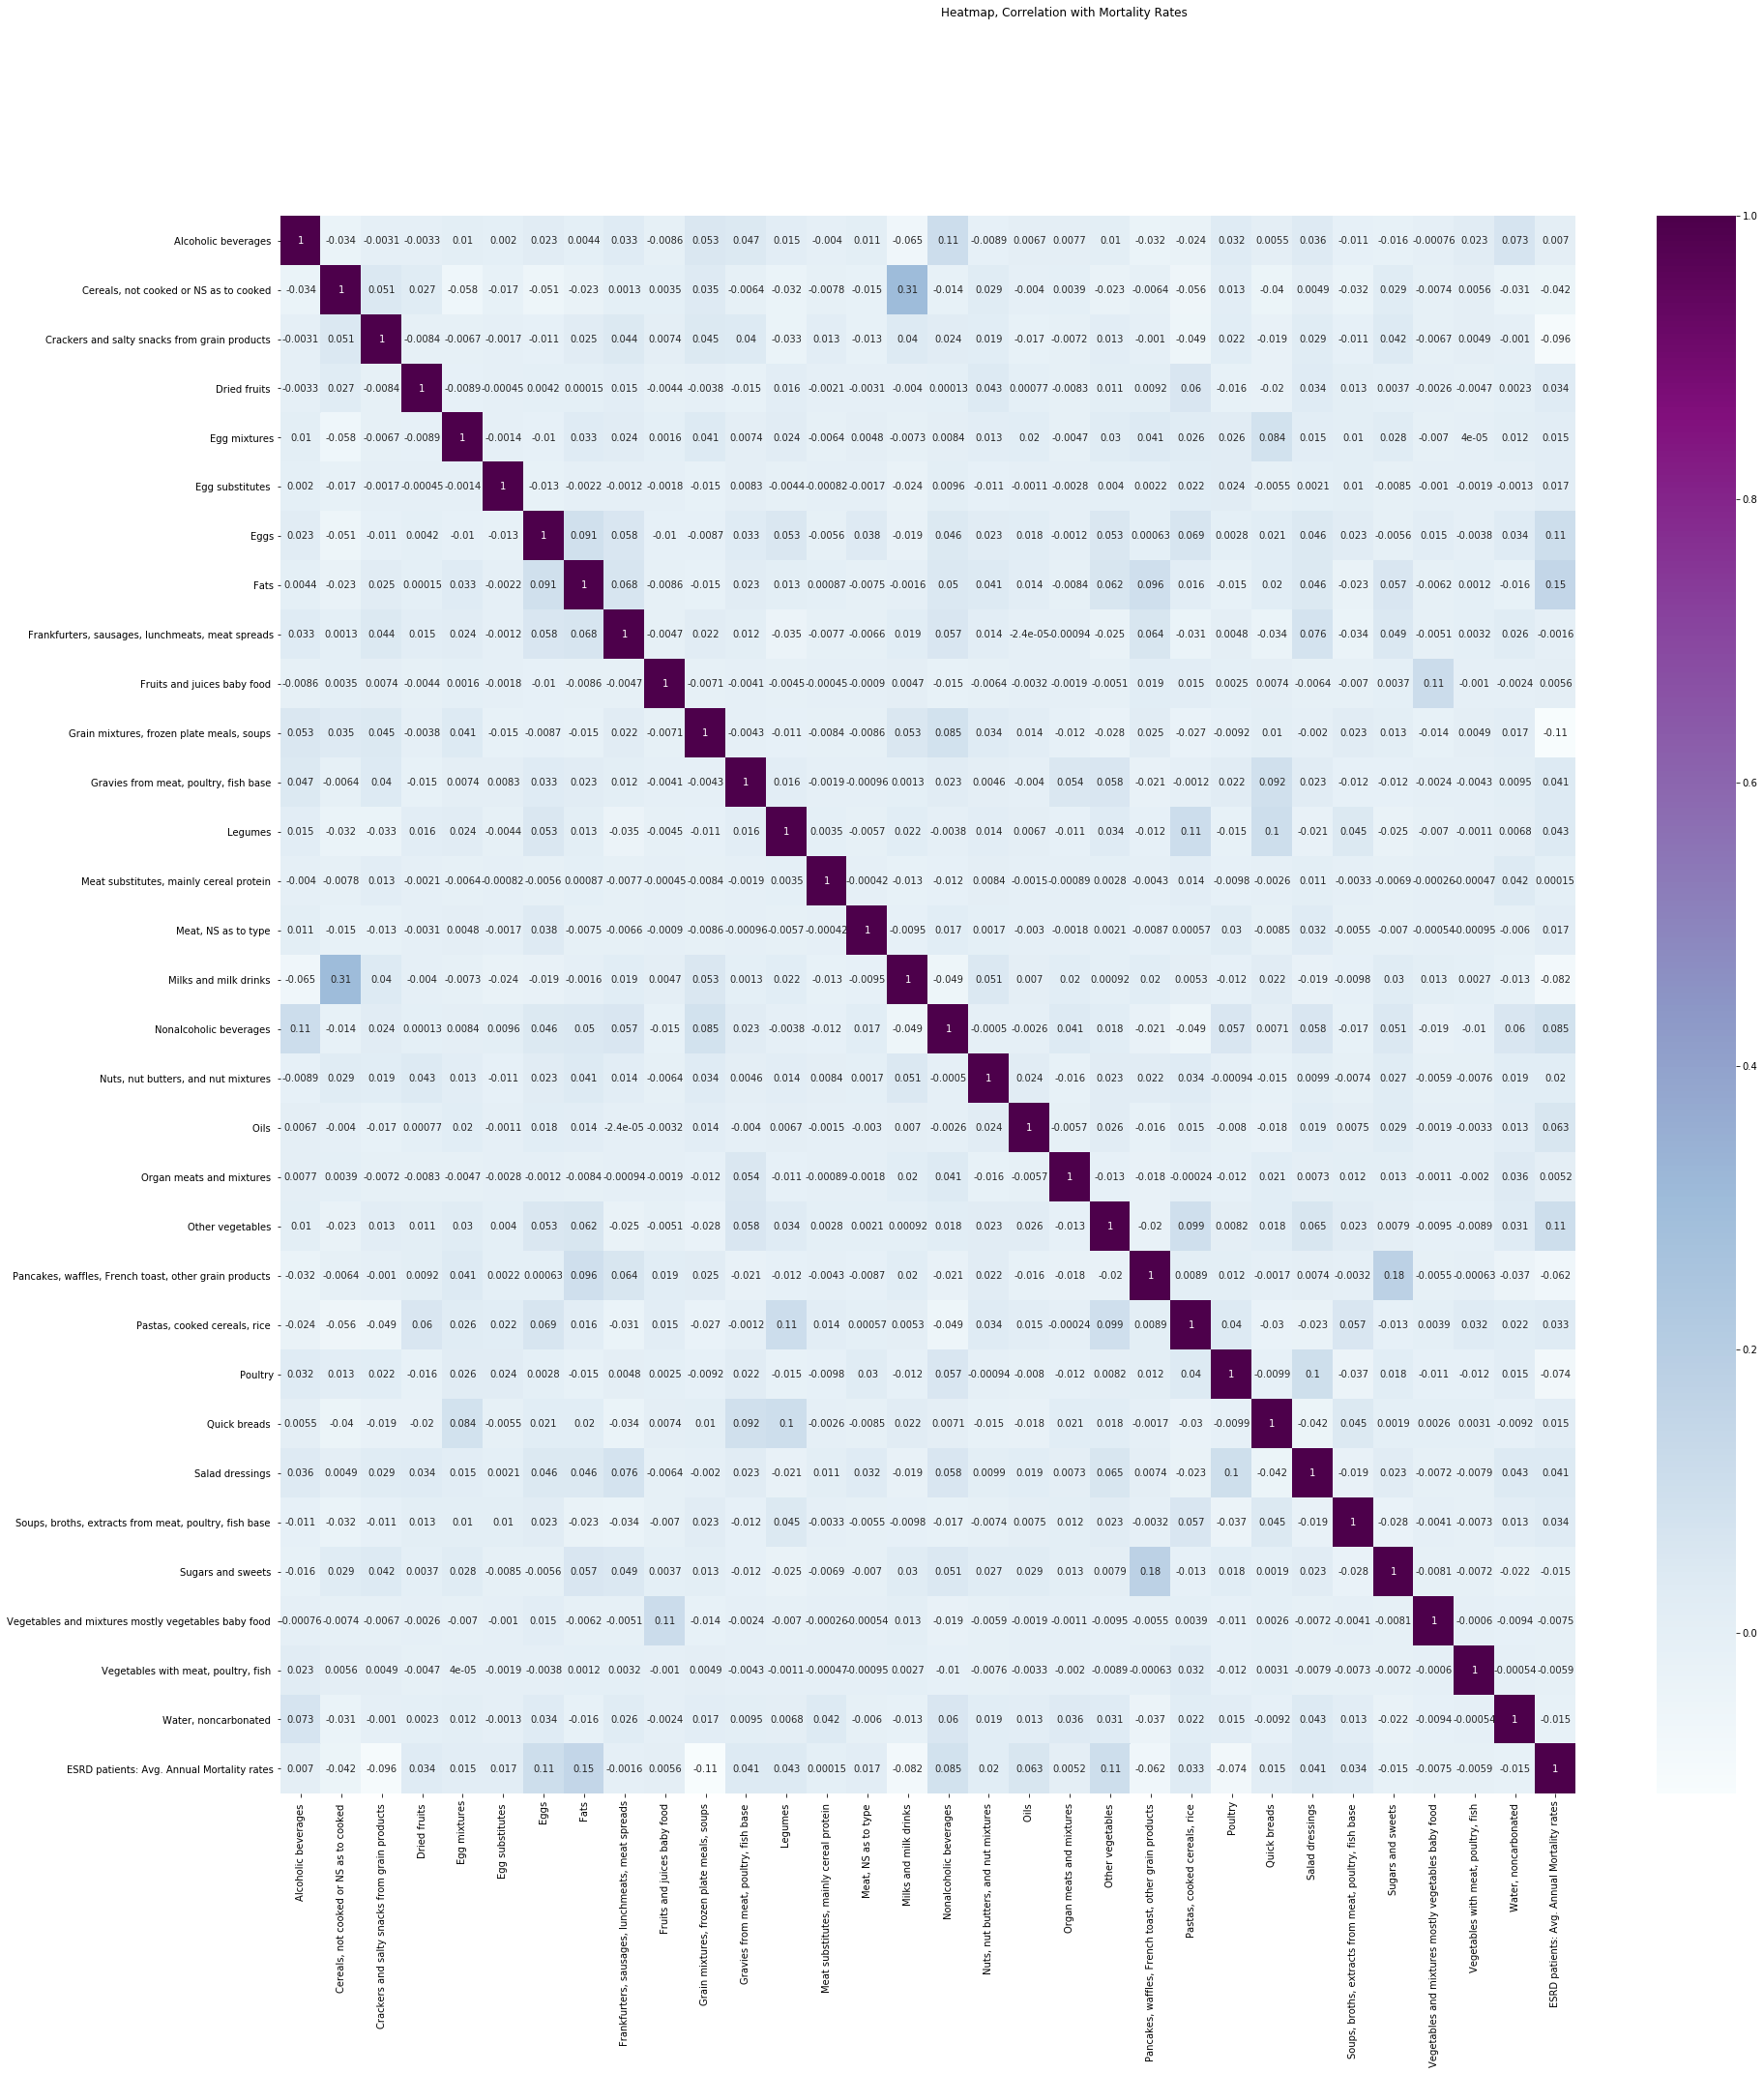

In [44]:
plt.figure(figsize=(30, 30))


corr = standardisedX_important.corr() #df_diff_ratio_with_mortality.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,
           cmap="BuPu");
plt.suptitle('Heatmap, Correlation with Mortality Rates');
plt.savefig('heatmap-ckd-mortality-subgroup-regression-after-pca.png')
standardisedX_important.columns

# Positives: 
Fats-0.15, Eggs - 0.11 
Grain mixtures, frozen plate meals, soups -0.112999    
Other Vegetables-0.11, 
Oils-0.06, 
Non-alcoholic beverages-0.08

In [45]:
corr['ESRD patients: Avg. Annual Mortality rates']

Alcoholic beverages                                       0.007024
Cereals, not cooked or NS as to cooked                   -0.041666
Crackers and salty snacks from grain products            -0.096117
Dried fruits                                              0.033700
Egg mixtures                                              0.014675
Egg substitutes                                           0.016655
Eggs                                                      0.107728
Fats                                                      0.150198
Frankfurters, sausages, lunchmeats, meat spreads         -0.001573
Fruits and juices baby food                               0.005582
Grain mixtures, frozen plate meals, soups                -0.112999
Gravies from meat, poultry, fish base                     0.040888
Legumes                                                   0.043489
Meat substitutes, mainly cereal protein                   0.000145
Meat, NS as to type                                       0.01

In [46]:
sorted(corr['ESRD patients: Avg. Annual Mortality rates'])

[-0.11299907027494109,
 -0.09611748315964774,
 -0.08217159447680202,
 -0.0738565285589871,
 -0.062213513519611525,
 -0.04166593113669318,
 -0.015395918134497475,
 -0.01461144073775251,
 -0.007500908975174448,
 -0.00588569829016431,
 -0.001573251615705923,
 0.00014548303143343768,
 0.005165026357915293,
 0.005581974313466474,
 0.0070237621295432635,
 0.014675065956548486,
 0.015310843530965677,
 0.01665509185649992,
 0.017287471062199286,
 0.020249018969597164,
 0.03310262115465734,
 0.03369982731259436,
 0.034371002783220014,
 0.04062725472332121,
 0.04088782063898631,
 0.04348885484899577,
 0.06343098938020271,
 0.08489284974377065,
 0.10531528617037846,
 0.1077278011620772,
 0.15019820088423128,
 1.0]

In [47]:
standardisedX_negatives =  standardisedX [
    [
        #'Alcoholic beverages ', 
        'Beef', 
        'Cakes, cookies, pies, pastries, bars ',
       'Cereals, not cooked or NS as to cooked ', 
        'Cheeses ',
       'Citrus fruits, juices ',
       'Crackers and salty snacks from grain products ',
       'Creams and cream substitutes ', 
        'Dark-green vegetables ',
       'Deep-yellow vegetables ', 
        'Dried fruits ', 
        'Egg mixtures',
       'Egg substitutes ', 'Eggs', 'Fats', 'Fish and shellfish ',
       'Formulated nutrition beverages, energy drinks, sports drinks, functional beverages ',
       'Frankfurters, sausages, lunchmeats, meat spreads',
       'Frozen or shelf-stable plate meals with meat, poultry, fish as major ingredient ',
       'Fruit juices and nectars excluding citrus ',
       'Fruits and juices baby food ',
       'Grain mixtures, frozen plate meals, soups ',
       'Gravies from meat, poultry, fish base ',
       'Lamb, veal, game, other carcass meat ', 'Legumes ',
       'Meat substitutes, mainly cereal protein ', 'Meat, NS as to type ',
       'Meat, poultry, fish in gravy or sauce or creamed ',
       'Meat, poultry, fish with starch item (includes white potatoes) ',
       'Meat, poultry, fish with starch item and vegetables ',
       'Meat, poultry, fish with vegetables (excluding white potatoes) ',
       'Milk desserts, sauces, gravies ', 'Milks and milk drinks ',
       'Mixtures mostly vegetables without meat, poultry, fish ',
       'Nonalcoholic beverages ', 'Nuts, nut butters, and nut mixtures ',
       'Oils ', 'Organ meats and mixtures ', 'Other fruits ',
       'Other vegetables ',
       'Pancakes, waffles, French toast, other grain products ',
       'Pastas, cooked cereals, rice ', 'Pork', 'Poultry', 'Quick breads ',
       'Salad dressings ', 'Sandwiches with meat, poultry, fish ',
       'Seeds and seed mixtures ',
       'Soups, broths, extracts from meat, poultry, fish base ',
       'Sugars and sweets ', 'Tomatoes and tomato mixtures ',
       'Vegetables and mixtures mostly vegetables baby food ',
       'Vegetables with meat, poultry, fish ', 'Water, noncarbonated ',
       'White potatoes and Puerto Rican starchy vegetables ',
       'Yeast breads, rolls '        
    ]
    
]
    
    

In [48]:
standardisedX_important = standardisedX_negatives
# standardisedX_important = 
standardisedX_important['ESRD patients: Avg. Annual Mortality rates'] = standardisedX_with_target['ESRD patients: Avg. Annual Mortality rates']

In [49]:
corr = standardisedX_important.corr()

In [50]:
corr_mortality = corr['ESRD patients: Avg. Annual Mortality rates']
corr_mortality

Beef                                                                                   0.026293
Cakes, cookies, pies, pastries, bars                                                   0.048692
Cereals, not cooked or NS as to cooked                                                -0.041666
Cheeses                                                                                0.013990
Citrus fruits, juices                                                                  0.003038
Crackers and salty snacks from grain products                                         -0.096117
Creams and cream substitutes                                                           0.058666
Dark-green vegetables                                                                  0.032223
Deep-yellow vegetables                                                                 0.063523
Dried fruits                                                                           0.033700
Egg mixtures                            

# Negatively affecting Mortality

Grain mixtures, frozen plate meals, soups -0.112999,

Crackers and salty snacks from grain products  -0.096117, 

Milks and milk drinks                                                                 -0.082172

Sandwiches with meat, poultry, fish                                                   -0.086808

Poultry                                                                               -0.073857

Index(['Beef', 'Cakes, cookies, pies, pastries, bars ',
       'Cereals, not cooked or NS as to cooked ', 'Cheeses ',
       'Citrus fruits, juices ',
       'Crackers and salty snacks from grain products ',
       'Creams and cream substitutes ', 'Dark-green vegetables ',
       'Deep-yellow vegetables ', 'Dried fruits ', 'Egg mixtures',
       'Egg substitutes ', 'Eggs', 'Fats', 'Fish and shellfish ',
       'Formulated nutrition beverages, energy drinks, sports drinks, functional beverages ',
       'Frankfurters, sausages, lunchmeats, meat spreads',
       'Frozen or shelf-stable plate meals with meat, poultry, fish as major ingredient ',
       'Fruit juices and nectars excluding citrus ',
       'Fruits and juices baby food ',
       'Grain mixtures, frozen plate meals, soups ',
       'Gravies from meat, poultry, fish base ',
       'Lamb, veal, game, other carcass meat ', 'Legumes ',
       'Meat substitutes, mainly cereal protein ', 'Meat, NS as to type ',
       'Meat, poultr

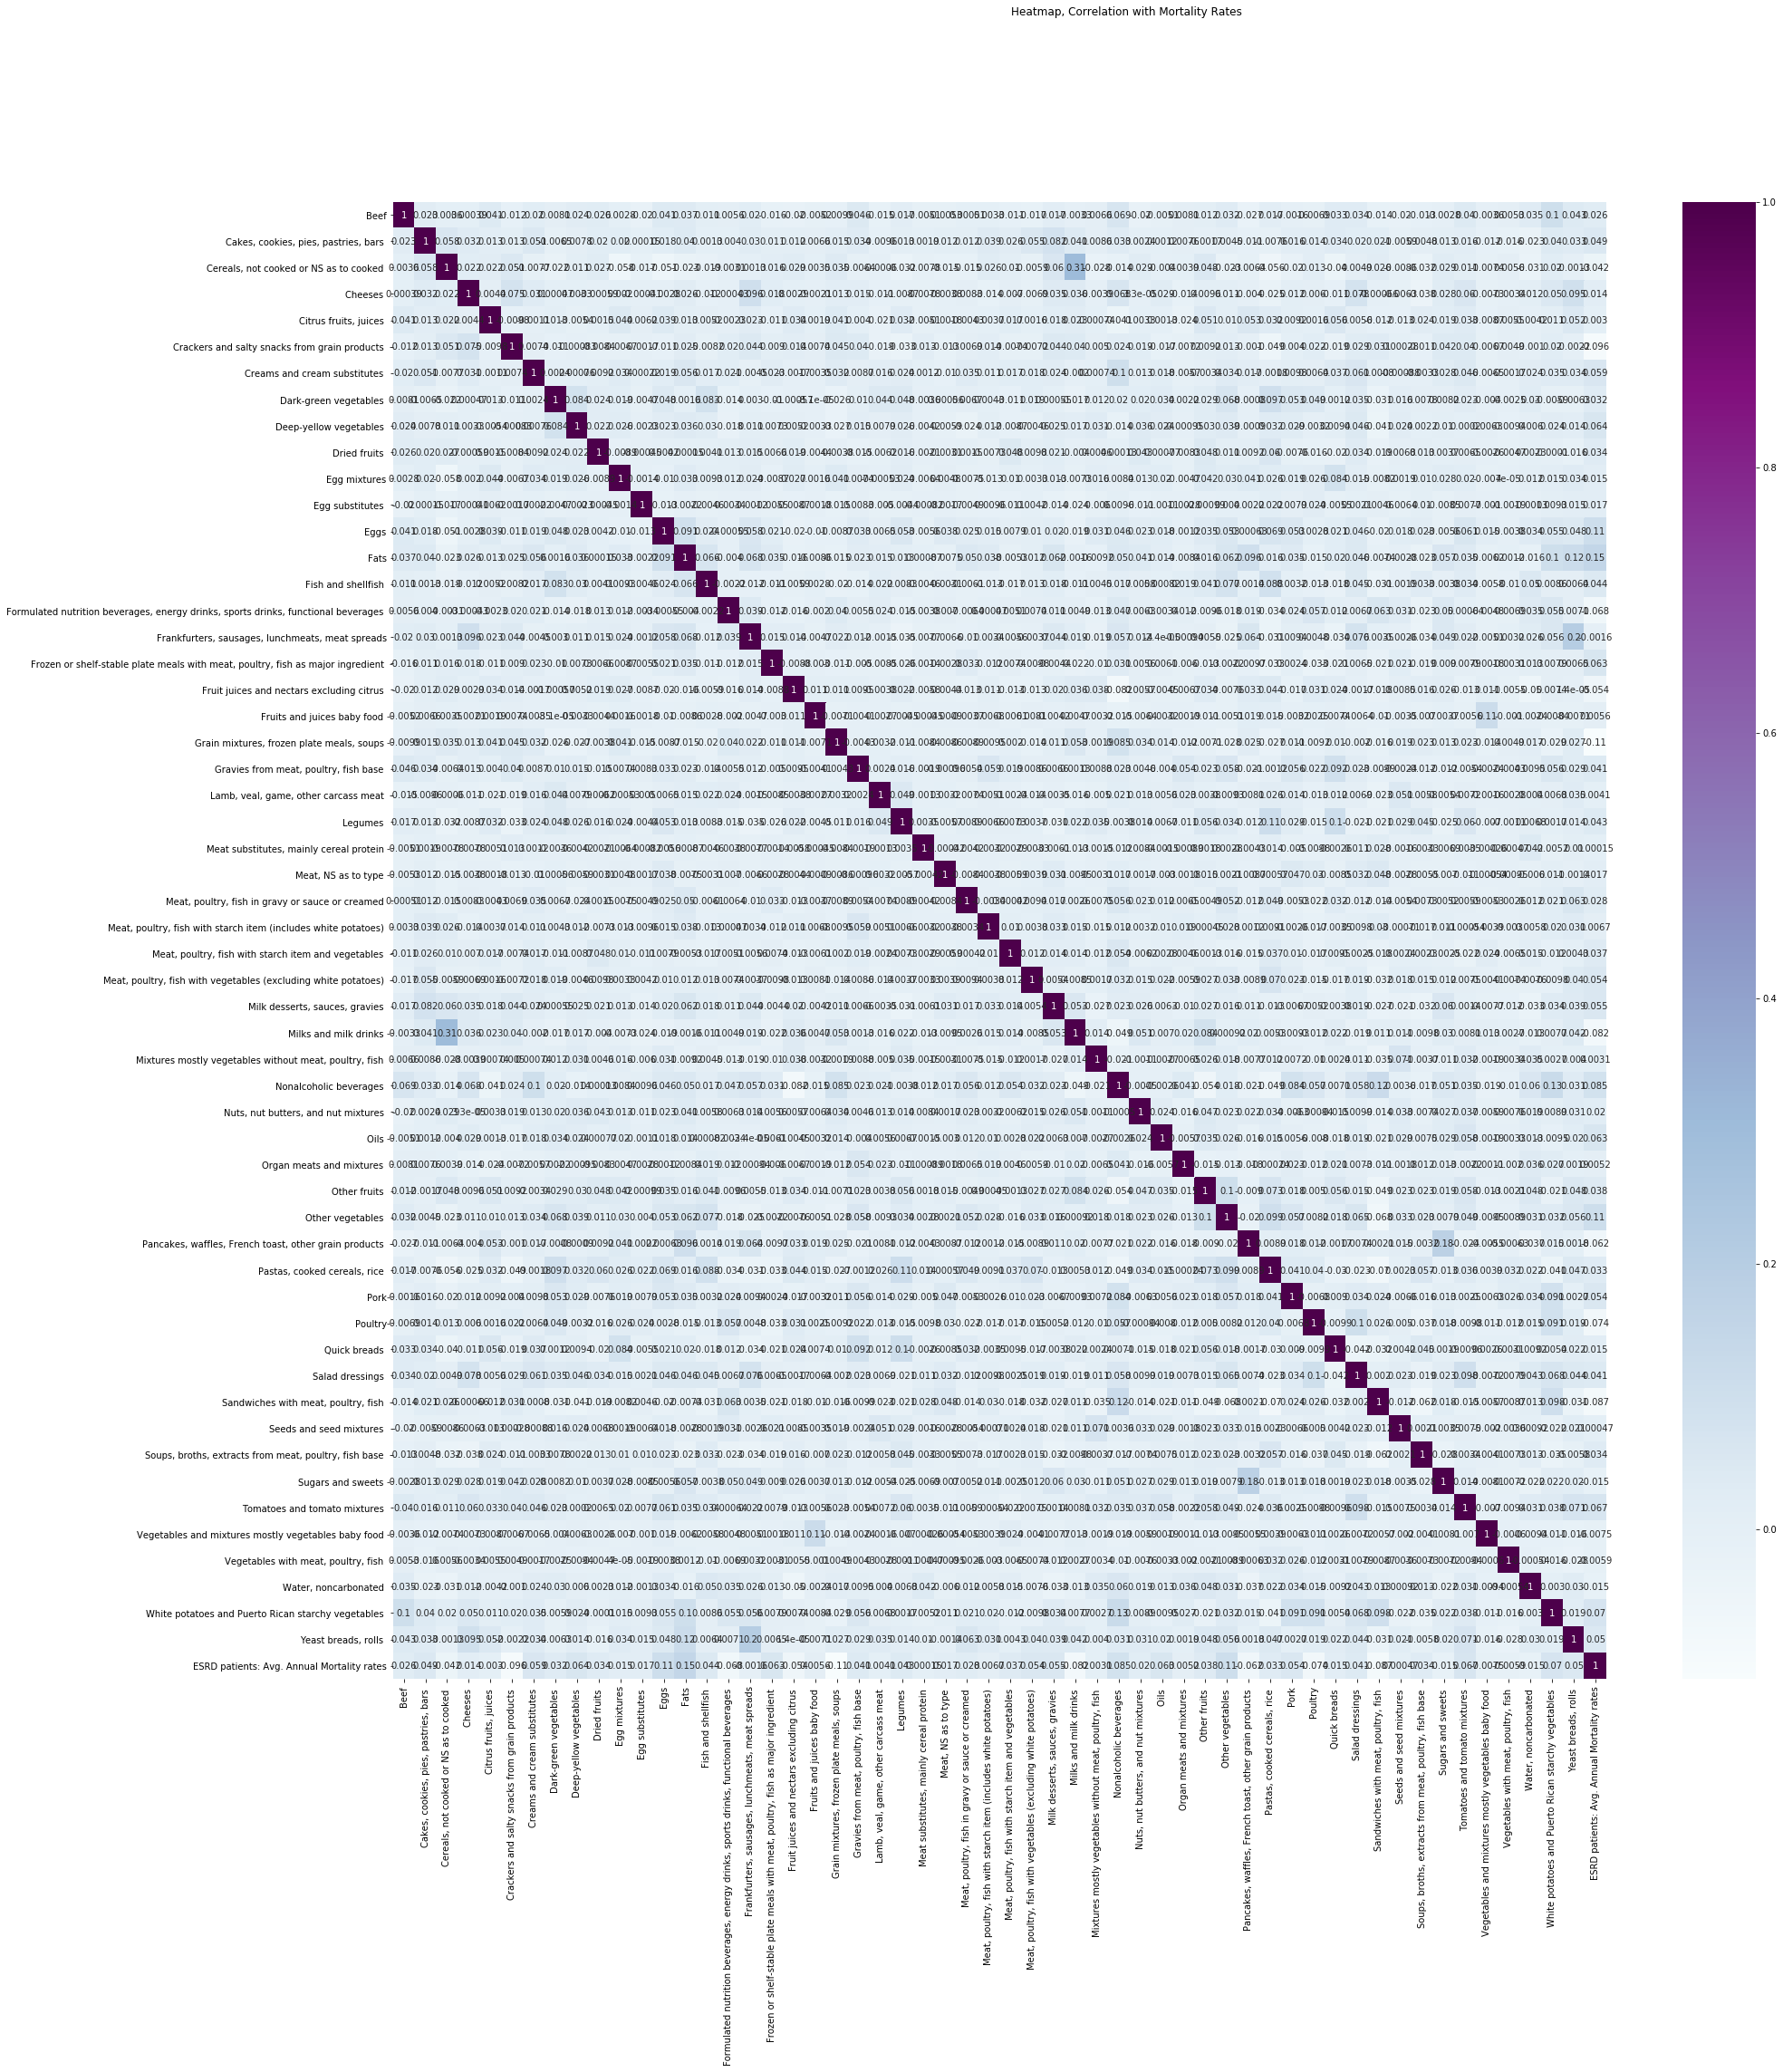

In [52]:
plt.figure(figsize=(30, 30))


corr = standardisedX_important.corr() #df_diff_ratio_with_mortality.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,
           cmap="BuPu");
plt.suptitle('Heatmap, Correlation with Mortality Rates');
plt.savefig('heatmap-ckd-mortality-subgroup-regression-after-pca.png')
standardisedX_important.columns

# Positively affecting : Mortality

Fats                                                                                   0.150198

Eggs                                                                                   0.107728

Other vegetables                                                                       0.105315

Nonalcoholic beverages                                                                 0.084893

White potatoes and Puerto Rican starchy vegetables                                     0.069673

Tomatoes and tomato mixtures                                                           0.066930

Oils                                                                                   0.063431

Deep-yellow vegetables                                                                 0.063523

In [53]:
sorted(corr_mortality) #, corr_mortality.sort_values(by=[''])

[-0.11299907027494109,
 -0.09611748315964774,
 -0.08680806654484965,
 -0.08217159447680202,
 -0.0738565285589871,
 -0.06820715274095843,
 -0.062213513519611525,
 -0.05428236600596184,
 -0.04166593113669318,
 -0.015395918134497475,
 -0.01461144073775251,
 -0.007500908975174448,
 -0.00588569829016431,
 -0.001573251615705923,
 0.00014548303143343768,
 0.0004710676359559384,
 0.003037865198958608,
 0.0031090846806755535,
 0.004058265024010087,
 0.005165026357915293,
 0.005581974313466474,
 0.006722634392887844,
 0.013990261403908685,
 0.014675065956548486,
 0.015310843530965677,
 0.01665509185649992,
 0.017287471062199286,
 0.020249018969597164,
 0.02629284023241227,
 0.028005043993894127,
 0.032222895413772296,
 0.03310262115465734,
 0.03369982731259436,
 0.034371002783220014,
 0.037186924470056865,
 0.038305261169677744,
 0.04062725472332121,
 0.04088782063898631,
 0.04348885484899577,
 0.044036280792394446,
 0.04869161429862228,
 0.04953183773103402,
 0.05367538692360563,
 0.05375798958

In [55]:
corr_mortality > 0

Beef                                                                                    True
Cakes, cookies, pies, pastries, bars                                                    True
Cereals, not cooked or NS as to cooked                                                 False
Cheeses                                                                                 True
Citrus fruits, juices                                                                   True
Crackers and salty snacks from grain products                                          False
Creams and cream substitutes                                                            True
Dark-green vegetables                                                                   True
Deep-yellow vegetables                                                                  True
Dried fruits                                                                            True
Egg mixtures                                                          

# test regression with all subgroups


In [71]:
corr_all = df_actual_only.corr()

In [72]:
corr_all_esrd_mortality = corr_all['ESRD patients: Avg. Annual Mortality rates']

In [73]:
df = pd.DataFrame(corr_all_esrd_mortality)

In [80]:
df_pos = df[df['ESRD patients: Avg. Annual Mortality rates'] > 0]
df_pos = df_pos.sort_values(by=['ESRD patients: Avg. Annual Mortality rates'], ascending=False)
df_pos

,ESRD patients: Avg. Annual Mortality rates
ESRD patients: Avg. Annual Mortality rates,1.000000
Fats,0.150198
Eggs,0.107728
Other vegetables,0.105315
Nonalcoholic beverages,0.084893
White potatoes and Puerto Rican starchy vegetables,0.069673
Tomatoes and tomato mixtures,0.066930
Deep-yellow vegetables,0.063523
Oils,0.063431
"Frozen or shelf-stable plate meals with meat, poultry, fish as major ingredient",0.062680


In [83]:
df_neg = df[df['ESRD patients: Avg. Annual Mortality rates'] < 0]
df_neg = df_neg.sort_values(by=['ESRD patients: Avg. Annual Mortality rates'], ascending=True)
df_neg

,ESRD patients: Avg. Annual Mortality rates
"Grain mixtures, frozen plate meals, soups",-0.112999
Crackers and salty snacks from grain products,-0.096117
"Sandwiches with meat, poultry, fish",-0.086808
Milks and milk drinks,-0.082172
Poultry,-0.073857
"Formulated nutrition beverages, energy drinks, sports drinks, functional beverages",-0.068207
"Pancakes, waffles, French toast, other grain products",-0.062214
Fruit juices and nectars excluding citrus,-0.054282
"Cereals, not cooked or NS as to cooked",-0.041666
"Water, noncarbonated",-0.015396


# The following code are not relevant

# Check: the data  First block is not relevant

In [55]:
plt.rcParams['figure.figsize'] = 5, 5 
negatively_grains = standardisedX_with_target[ ['Actual Grain Intake', 'ESRD patients: Avg. Annual Mortality rates']]
negatively_grains.plot.line()
plt.title('Standardised.  Actual Grain Intake  \n and ESRD Mortality Rates')
plt.show()

negatively_grains = negatively_grains.sort_values(by='Actual Grain Intake', ascending=True)
#positively_other = positively[['Actual Other vegetables Intake', 'ESRD patients: Avg. Annual Mortality rates']]
negatively_grains.plot.line()
plt.title('Standardised. Actual Grain Intake  SORTED\n and ESRD Mortality Rates')
plt.savefig('positive_subgroup_line_1')
negatively_grains
plt.show()

plt.rcParams['figure.figsize'] = 5, 5
negatively_grains = df_esrdonly_actual_only[ ['Actual Grain Intake', 'ESRD patients: Avg. Annual Mortality rates']]
#positively_other = positively[['Actual Other vegetables Intake', 'ESRD patients: Avg. Annual Mortality rates']]
negatively_grains.plot.line()
plt.title('Raw data. Actual Grain Intake   \n and ESRD Mortality Rates')
plt.show()

plt.savefig('positive_subgroup_line_1')
negatively_grains

sns.pairplot(negatively_grains,   vars=negatively_grains.columns, size=5, kind='reg'); # diag_kind='kde',
plt.title('Raw data. Actual Grain Intake \n and ESRD Mortality Rates')
plt.show()

KeyError: "['Actual Grain Intake'] not in index"

In [54]:
plt.rcParams['figure.figsize'] = 5, 5 
positively = standardisedX_important[ ['Actual Other vegetables Intake', 'Actual Red and orange vegetables Intake', 'Actual Starchy vegetables Intake', 'ESRD patients: Avg. Annual Mortality rates']]

positively_other = positively[['Actual Other vegetables Intake', 'ESRD patients: Avg. Annual Mortality rates']]
positively_other.plot.line()
plt.savefig('positive_subgroup_line_1')
plt.title('Standardised.  Actual  Other vegetables Intake  \n and ESRD Mortality Rates')
plt.show()

positively_other = positively_other.sort_values(by=['Actual Other vegetables Intake'])
positively_other.plot.line()
plt.savefig('positive_subgroup_line_1')
plt.title('Standardised. Actual  Other vegetables Intake  \n and ESRD Mortality Rates')
plt.show()



#--------------------
positively_red = positively[['Actual Red and orange vegetables Intake', 'ESRD patients: Avg. Annual Mortality rates']]
positively_red.plot.line()
plt.savefig('positive_subgroup_line_2')

positively_starchy = positively[['Actual Starchy vegetables Intake', 'ESRD patients: Avg. Annual Mortality rates']]
positively_starchy.plot.line()
plt.savefig('positive_subgroup_line_3')

KeyError: "['Actual Other vegetables Intake'\n 'Actual Red and orange vegetables Intake'\n 'Actual Starchy vegetables Intake'] not in index"

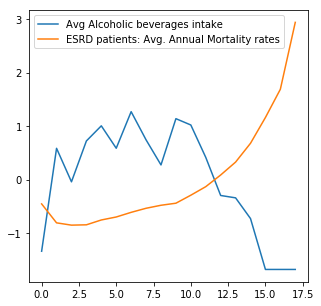

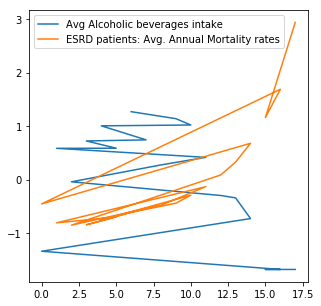

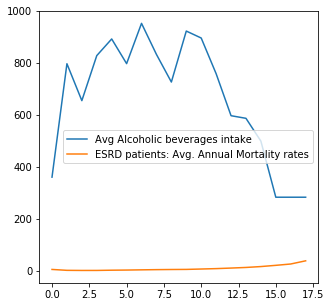

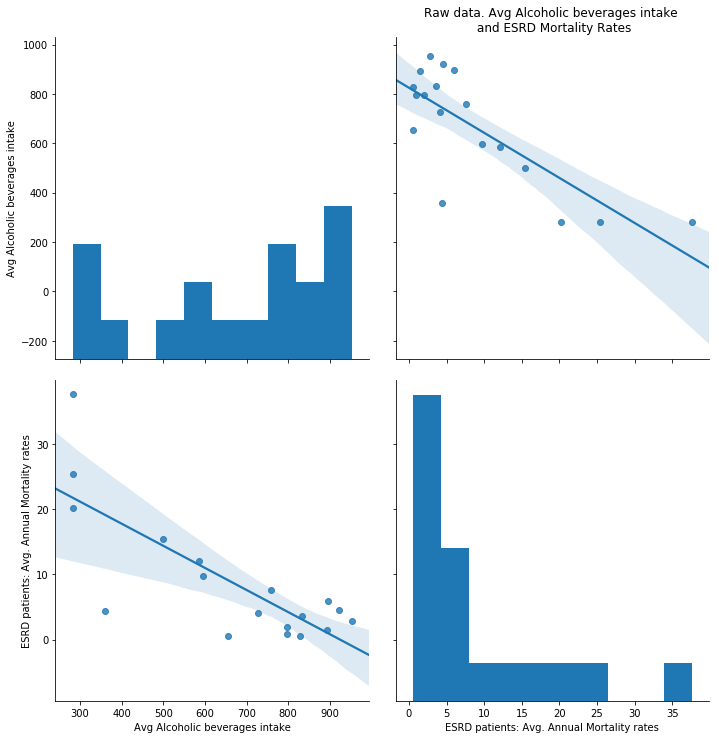

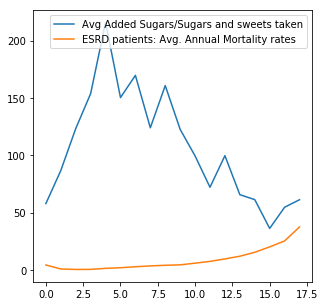

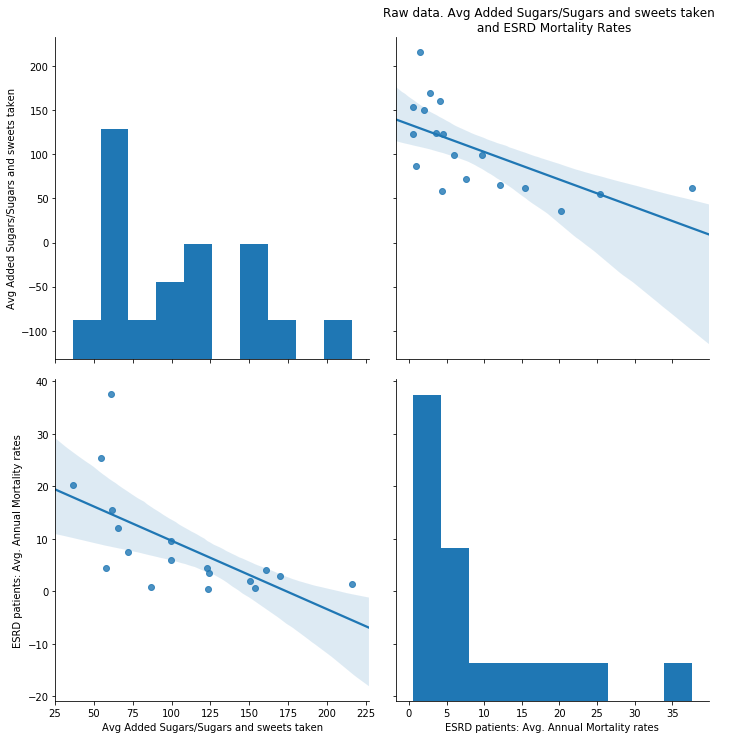

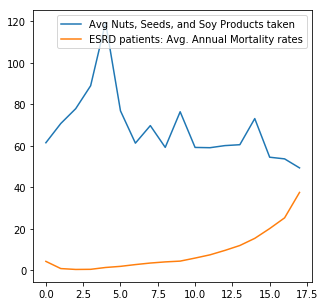

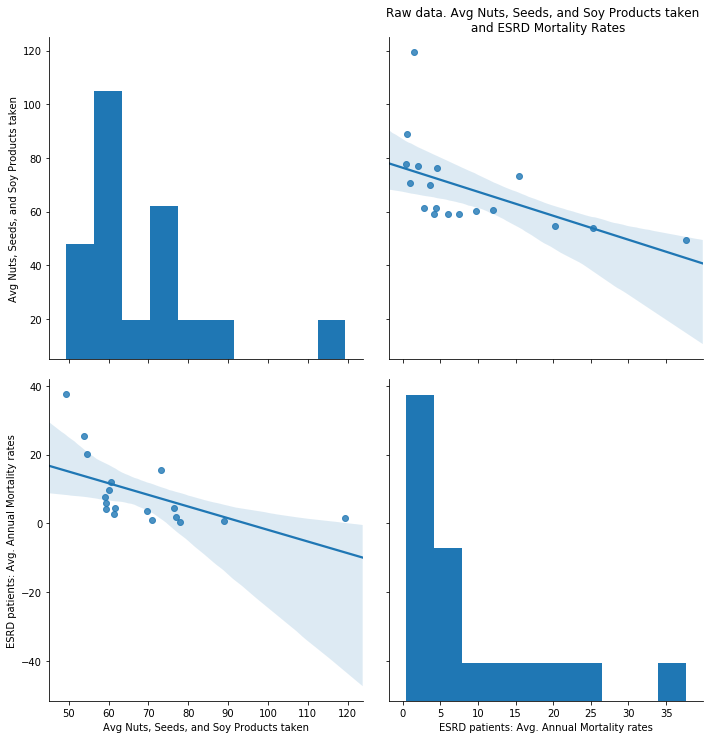

In [37]:
negatively= standardisedX_important[ ['Avg Alcoholic beverages intake', 'Avg Added Sugars/Sugars and sweets taken', 'Avg Nuts, Seeds, and Soy Products taken',  'ESRD patients: Avg. Annual Mortality rates']]
negatively_alcohol = negatively[['Avg Alcoholic beverages intake', 'ESRD patients: Avg. Annual Mortality rates']]
negatively_alcohol.plot.line()
plt.savefig('./saved-images/negatively_subgroup_line_1')


negatively_alcohol = negatively_alcohol.sort_values(by=['Avg Alcoholic beverages intake'])
negatively_alcohol.plot.line()
plt.savefig('./saved-images/negatively_subgroup_line_1')


negatively= df_actual_only[ ['Avg Alcoholic beverages intake', 'Avg Added Sugars/Sugars and sweets taken', 'Avg Nuts, Seeds, and Soy Products taken',  'ESRD patients: Avg. Annual Mortality rates']]
negatively_alcohol = negatively[['Avg Alcoholic beverages intake', 'ESRD patients: Avg. Annual Mortality rates']]
negatively_alcohol.plot.line()
plt.savefig('./saved-images/negatively_subgroup_line_1')

sns.pairplot(negatively_alcohol,   vars=negatively_alcohol.columns, size=5, kind='reg'); # diag_kind='kde',
plt.title('Raw data. Avg Alcoholic beverages intake \n and ESRD Mortality Rates')
plt.show()

#---

negatively_sugar = negatively[['Avg Added Sugars/Sugars and sweets taken', 'ESRD patients: Avg. Annual Mortality rates']]
negatively_sugar.plot.line()
plt.savefig('./saved-images/negatively_subgroup_line_2')

sns.pairplot(negatively_sugar,   vars=negatively_sugar.columns, size=5, kind='reg'); # diag_kind='kde',
plt.title('Raw data. Avg Added Sugars/Sugars and sweets taken  \n and ESRD Mortality Rates')
plt.show()

#------

negatively_nuts = negatively[['Avg Nuts, Seeds, and Soy Products taken', 'ESRD patients: Avg. Annual Mortality rates']]
negatively_nuts.plot.line()
plt.savefig('./saved-images/negatively_subgroup_line_3')

sns.pairplot(negatively_nuts,   vars=negatively_nuts.columns, size=5, kind='reg'); # diag_kind='kde',
plt.title('Raw data. Avg Nuts, Seeds, and Soy Products taken  \n and ESRD Mortality Rates')
plt.show()

# https://www.statcan.gc.ca/eng/dai/btd/asr

In [ ]:
plt.rcParams['figure.figsize'] = 5, 5 
positively = standardisedX_important[ ['Actual Other vegetables Intake', 'Actual Red and orange vegetables Intake', 'Actual Starchy vegetables Intake', 'ESRD patients: Avg. Annual Mortality rates']]

positively_other = positively[['Actual Other vegetables Intake', 'ESRD patients: Avg. Annual Mortality rates']]
positively_other.plot.line()
plt.savefig('positive_subgroup_line_1')
plt.title('Standardised.  Actual  Other vegetables Intake  \n and ESRD Mortality Rates')
plt.show()

positively_other = positively_other.sort_values(by=['Actual Other vegetables Intake'])
positively_other.plot.line()
plt.savefig('positive_subgroup_line_1')
plt.title('Standardised. Actual  Other vegetables Intake  \n and ESRD Mortality Rates')
plt.show()

# The following code were relevant for exploration phase. For experiment and methodology the above code are relevant


# Univariate

Checked and plotted each column. 

Recommended intake amount is not included in the data (can be calculated like food groups)


In [ ]:
"""
plt.figure(figsize=(16, 5));
#plt.rcParams['figure.figsize'] = 14, 14
df[' Actual Dark-green vegetables Intake'].plot.bar();
#plt.setxlabels(df['age_to'])
plt.suptitle('Actual Dark-green vegetables Intake')
plt.xticks(range(len(df[' Age-group: From USRDS'])), df[' Age-group: From USRDS']);
plt.xlabel('Age Group: From')
"""

In [ ]:
df = pd.read_csv('./data-for-code/older_no-empty-cell-mortality_subgroup_data_june_9th_gender_neutral-based_data_after_processing.csv')
#plt.figure(figsize=(16, 5));
plt.rcParams['figure.figsize'] = 14, 7
df1 = df.iloc[:,3:6]
df2 = df.iloc[:,6:9]
df3 = df.iloc[:,9:12]
df4 = df.iloc[:,12:15]
df5 = df.iloc[:,15:20]
df6 = df.iloc[:,20:24]

#df7 = df.iloc[:,22:24]
#df8 = df.iloc[:,30:33]
#df9 = df.iloc[:,33:36]

df1.plot.bar();
plt.title('Univariate plots, Check Legends for Aspects Plotted')

df2.plot.bar();
df3.plot.bar();
df4.plot.bar();
df5.plot.bar();
df6.plot.bar();
#df7.plot.bar();
#df8.plot.bar();
#df9.plot.bar();

plt.xticks(range(len(df[' Age-group: To USRDS'])), df[' Age-group: From USRDS']);
plt.xlabel('Age Groups (from)')
plt.ylabel('Amount in Gms')
plt.suptitle('Univariate plots, Check Legends for Aspect')




In [ ]:
df1.plot.line();
df2.plot.line();
df3.plot.line();
df4.plot.line();
df5.plot.line();
df6.plot.line();
#df7.plot.line();


plt.xlabel('Age Groups (from)')
plt.ylabel('Amount in Gms')
plt.suptitle('Univariate plots, Check Legends for Aspect')
plt.xticks(range(len(df[' Age-group: To USRDS'])), df[' Age-group: From USRDS']);

In [ ]:

df1.plot.area();
df2.plot.area();
df3.plot.area();
df4.plot.area();
df5.plot.area();
df6.plot.area();
#df7.plot.area();

plt.xlabel('Age Groups (from)')
plt.ylabel('Amount in Gms')
plt.suptitle('Univariate plots, Check Legends for Aspect')
plt.xticks(range(len(df[' Age-group: To USRDS'])), df[' Age-group: From USRDS']);

In [ ]:
df1.plot.hist();
df2.plot.hist();
df3.plot.hist();
df4.plot.hist();
df5.plot.hist();
df6.plot.hist();
#df7.plot.hist();


plt.xlabel('Age Groups (from)')
plt.ylabel('Amount in Gms')
plt.suptitle('Univariate plots, Check Legends for Aspect')
plt.xticks(range(len(df[' Age-group: To USRDS'])), df[' Age-group: From USRDS']);

In [ ]:
df1.plot.box();
df2.plot.box();
df3.plot.box();
df4.plot.box();
df5.plot.box();
df6.plot.box();
#df7.plot.box();


plt.xlabel('Age Groups (from)')
plt.ylabel('Amount in Gms')
plt.suptitle('Univariate plots, Check Legends for Aspect')
plt.xticks(range(len(df[' Age-group: To USRDS'])), df[' Age-group: From USRDS']);

In [ ]:
df.corr()

In [ ]:
import numpy as np
import pandas as pd 
from subprocess import check_output

from IPython.display import display, HTML
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv('./data-for-code/no-empty-cell-mortality_subgroup_data_june_9th_gender_neutral-based_data_after_processing.csv')
df.head()

In [ ]:
df.corr()

Age-group: From USRDS	Age-group: To USRDS	Actual Dark-green vegetables Intake	Actual Red and orange vegetables Intake	Actual Starchy vegetables Intake	Actual Other vegetables Intake	Actual Whole grains intakes	Actual Taken Refined grains amount	Avg Meat, Poultry and Eggs subgroup taken	Avg Seafood taken	...	Avg Solid Fats taken	Avg Milks and milk drinks taken	Avg Water, noncarbonated intake	Avg Alcoholic beverages intake	Avg Nonalcoholic beverages taken	Avg Milk desserts, sauces, gravies taken	ESRD patients: Total (or %) deaths for target year	ESRD patients: Avg. Annual Mortality rates	Dialysis patients: Total (or %) deaths for target year	Dialysis patients: Avg. Annual Mortality rates
ESRD patients: Total (or %) deaths for target year	0.909230	0.909458	0.056973	0.572518	0.517307	0.542376	-0.469825	0.112844	-0.036558	0.107024	...	-0.236728	-0.598140	-0.023290	-0.738501	0.384077	0.353425	1.000000	0.833280	0.999627	0.868295
ESRD patients: Avg. Annual Mortality rates	0.854852	0.854771	-0.082390	0.545127	0.444551	0.676325	-0.609984	0.057939	-0.216943	-0.113325	...	-0.365416	-0.461741	-0.150719	-0.786412	0.192810	0.336838	0.833280	1.000000	0.847302	0.995724
Dialysis patients: Total (or %) deaths for target year	0.914521	0.914720	0.054157	0.577456	0.518309	0.554746	-0.478563	0.114916	-0.042973	0.100156	...	-0.241894	-0.598720	-0.028184	-0.744098	0.381084	0.357477	0.999627	0.847302	1.000000	0.880661
Dialysis patients: Avg. Annual Mortality rates	0.878499	0.879277	-0.076082	0.564846	0.453687	0.675571	-0.613042	0.035448	-0.205311	-0.097894	...	-0.369415	-0.485633	-0.136271	-0.791673	0.225472	0.314988	0.868295	0.995724	0.880661	1.000000
    

In [ ]:
len(df.columns)

In [ ]:
plt.figure(figsize=(12, 8))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

In [ ]:
df = df.drop(['Gender'], axis=1)

In [ ]:
df_normalized = (df - df.mean())/ (df.max() - df.min())
df_normalized.head()

In [ ]:
df_normalized.corr()

In [ ]:
plt.figure(figsize=(12, 8))

corr = df_normalized.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

# Bivariate

Bivariate plots on actual amount intake and target variables. will be saved in bivariate_food_subgroup.png. The correlation pattern can be checked in the image saved

The correlation are shown in heatmaps and Pearson's correlations. Now linearity and non-linearity can be seen using the Bivariate plots below. 

The plots show similarity with correlations

In [ ]:
df = pd.read_csv('./data-for-code/no-empty-cell-mortality_subgroup_data_june_9th_gender_neutral-based_data_after_processing.csv')
df.head()

In [ ]:
df.columns

In [ ]:
# on actual amounts
# plt.figure(figsize=(16, 300))
#df = df.drop(['Gender', 'Age-group: From USRDS', 'Age-group: To USRDS'], axis=1)
sns.pairplot(df, vars=df.columns, size=5, kind='reg'); # diag_kind='kde',
plt.title('Bivariate Plot, Food Subgroups');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_food_subgroup' + '.png')            
plt.show()

# Bivariate plots with few variables at each plot

'ESRD patients: Avg. Annual Mortality rates'  is used as the target variable

In [ ]:
df1 = df.iloc[:,3:6]
df1['ESRD patients: Avg. Annual Mortality rates'] = df['ESRD patients: Avg. Annual Mortality rates']


df2 = df.iloc[:,6:9]
df2['ESRD patients: Avg. Annual Mortality rates'] = df['ESRD patients: Avg. Annual Mortality rates']

df3 = df.iloc[:,9:12]
df3['ESRD patients: Avg. Annual Mortality rates'] = df['ESRD patients: Avg. Annual Mortality rates']

df4 = df.iloc[:,12:15]
df4['ESRD patients: Avg. Annual Mortality rates'] = df['ESRD patients: Avg. Annual Mortality rates']


df5 = df.iloc[:,15:17]
df5['ESRD patients: Avg. Annual Mortality rates'] = df['ESRD patients: Avg. Annual Mortality rates']

#df6 = df.iloc[:,18:21]
df7 = df.iloc[:,17:24]
#df7[' ESRD patients: Avg. Annual Mortality rates'] = df[' ESRD patients: Avg. Annual Mortality rates']


In [ ]:
plt.figure(figsize=(14, 14))
sns.pairplot(df1, diag_kind='kde', kind='reg', size=5);

#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable')
#plt.yticks(rotation=70);
#plt.xticks(rotation=70);
#g.set_xlabels(g.get_xlabels(), rotation=90)
#plt.xlabel(range(len(df1.columns)), df1.columns, rotation=90);
# plt.setyylable('dd', rotation=90);

In [ ]:
sns.pairplot(df2, diag_kind='kde', kind='reg', size=5);
#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable')
#plt.yticks(rotation=90);

In [ ]:
sns.pairplot(df3, diag_kind='kde', kind='reg', size=5);

In [ ]:
sns.pairplot(df4, diag_kind='kde', kind='reg', size=5);

In [ ]:

sns.pairplot(df5, diag_kind='kde', kind='reg', size=5);
#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable')
#plt.yticks(rotation=90);

In [ ]:
sns.pairplot(df6, diag_kind='kde', kind='reg', size=5);
#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable')
#plt.yticks(rotation=90);

# PCA: Just experiment and Exploration only:
# Will reuse some methods from a github project and apply on our data


In [ ]:
#steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
df = pd.read_csv('./data-for-code/no-empty-cell-mortality_subgroup_data_june_9th_gender_neutral-based_data_after_processing.csv')
df.head()



In [ ]:
df_pca = df.drop(['Age-group: From USRDS', 'Age-group: To USRDS', 'Gender'],axis=1)
import sklearn 
from sklearn import preprocessing
import numpy as np
standardisedX = sklearn.preprocessing.scale(df_pca)
standardisedX = pd.DataFrame(standardisedX, index=df_pca.index, columns=df_pca.columns)
standardisedX.apply(np.mean)

In [ ]:
standardisedX.apply(np.std)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA().fit(standardisedX)
pca

In [ ]:
#ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame( list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [ ]:
summary = pca_summary(pca, standardisedX)

In [ ]:
# First Five component can define over 91% 

In [ ]:
np.sum(summary.sdev**2)

In [ ]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

plt.rcParams['figure.figsize'] = 8, 8   
screeplot(pca, standardisedX)

In [ ]:
# comp 3 to comp 4 is the most change for slope
# first three or at best first 4 can be retained

In [ ]:
summary.sdev**2

In [ ]:
pca.components_[0]

In [ ]:
np.sum(pca.components_[0]**2)

In [ ]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code, I am using this as (similar to) a library function
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [ ]:
calcpc(standardisedX, pca.components_[0])

In [ ]:
pca.transform(standardisedX)[:, 0]

In [ ]:
pca.components_[1]

In [ ]:
np.sum(pca.components_[1]**2)

In [ ]:
# for following code : Classes will/might be defined such as like High, low, neutral mortality in final work

In [ ]:
sorted(standardisedX['ESRD patients: Avg. Annual Mortality rates'])

In [ ]:
y = standardisedX['ESRD patients: Avg. Annual Mortality rates'] > 0.5
y

In [ ]:
# # ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code from the URL above, using this as a library function
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

#y = df_pca[' ESRD patients: Total (or %) deaths for target year']
#y = np.std(pca.transform(standardisedX), axis=0)**2
pca_scatter(pca, standardisedX, y)

# y can be used as classes like High, low, neutral mortality

plt.suptitle('Mortality class and Principle components, y can be used as classes like High, low, neutral mortality');

In [ ]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21



#keep four components
pca_components_cont = pca.components_[0:5]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1,2,3],['1st Comp','2nd Comp', '3rd comp', '4th comp'],fontsize=10)
plt.colorbar()

plt.xticks(range(len(df_pca.columns)), df_pca.columns, rotation=65,ha='left')

plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_sub_groups_what_contributes_to_PCA_components' + '.png')            
plt.show()# 

In [ ]:
plt.figure(figsize=(16, 10));

diffs = list(df_pca.columns[:-1]) 
import seaborn as sns
s = sns.heatmap(df_pca[diffs].corr(),cmap='coolwarm') 
#s.set_yticklabels(s.get_yticklabels(),rotation=60,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=7)
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_sub_groups_how_in_together_influencing_PCA_components' + '.png')            
plt.show()

https://www.kaggle.com/etakla/exploring-the-dataset-univariate-analysis
https://www.kaggle.com/etakla/exploring-the-dataset-bivariate-analysis
https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e
https://lifelines.readthedocs.io/en/latest/
https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html
https://www.statsdirect.com/help/survival_analysis/cox_regression.htm
https://courses.lumenlearning.com/suny-natural-resources-biometrics/chapter/chapter-7-correlation-and-simple-linear-regression/

# References
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
